<a href="https://colab.research.google.com/github/EsraaMohamedMorsy/Portofolio/blob/main/Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> This dataset was gathered from Real State website



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Housing_Prices.csv')

In [ ]:
df.head(5)

,Title,Location,Price,Unit Type,BedRooms,BathRooms,Area,Unnamed: 7,Unnamed: 8
0,Buy Your Apartment 171m In Cresta Bella Hills,Request Details,"4,100,000.00",Apartment,3,3,171.0,NaN,NaN
1,Get A Townhouse In Porto October Compound,New Cairo,"2,800,000.00",Town,3,3,158.0,NaN,NaN
2,Your Dream Villa In 6 October Mountain View Ic...,7,"5,954,581.00",Villa,4,2,265.0,NaN,NaN
3,Villas for sale in Etapa by City Edge starting...,New Cairo,"8,675,325.00",Villa,3,4,317.0,NaN,NaN
4,Administrative units for sale in Cairo Busines...,6th October,"5,184,000.00",Office,4,2,162.0,NaN,NaN


#Dataset Cleaning

In [ ]:
#Drop nan columns
df=df.drop(columns=['Unnamed: 7','Unnamed: 8'])

In [ ]:
df=df.rename(columns={'Unit Type':'Unit_Type'})

In [ ]:
df.duplicated().sum()

1001

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(11881, 7)

Clean Price Column and divise it by 1000 so it will be easier in the Analysis

In [ ]:
df['Price']=df['Price'].apply(lambda x:x.replace(',',''))

In [ ]:
df['Price']=df['Price'].astype(str).astype(float)

In [ ]:
df['Price']=df['Price']/1000

Create price per square meter column

In [ ]:
df['price_per_m2']=df['Price']/df['Area']

In [ ]:
# Check if there is zeros
df.query('Price==0')

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2


In [ ]:
# Check if there is zeros
df.query('Area==0')

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2
5233,Buy Your Unit Now in Paris Mall New Capital Wi...,New Administrative Capital,5000.0,Office,1,0,0.0,inf
9457,Apartments for sale from 120 to 220,New Administrative Capital,1200.0,Apartment,1,2,0.0,inf
11016,50 Meters Stores for sale in Audaz,New Administrative Capital,3912.5,Store,1,5,0.0,inf
11204,"For Less Than The Market Price, A Clinic In Ma...",New Administrative Capital,2000.0,Clinic,1,6,0.0,inf


In [ ]:
# Drop zeroes columns
df.drop([5233,9457,11016,11204], inplace=True)

In [ ]:
df.describe()

,Price,BedRooms,BathRooms,Area,price_per_m2
count,11877.000000,11877.000000,11877.000000,11877.000000,11877.000000
mean,4801.897209,2.801718,2.272459,185.585080,33.690305
std,7439.517148,1.306577,1.090017,120.402601,90.306865
min,0.530000,1.000000,0.000000,1.000000,0.004077
25%,2100.000000,2.000000,1.000000,109.000000,14.778325
50%,3302.400000,3.000000,2.000000,163.000000,20.703934
75%,5490.000000,4.000000,3.000000,235.000000,32.000000
max,336145.000000,9.000000,9.000000,987.000000,3518.221000


<AxesSubplot:>

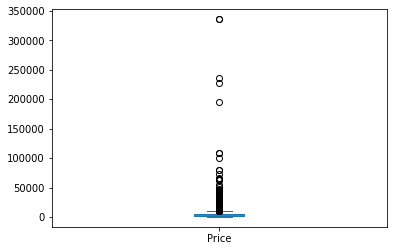

In [ ]:
df['Price'].plot(kind='box')

There is some outliers that we should take them from the dataset, to better understand its statistics

In [ ]:
price_outliers=df.query('Price >= 100000')
price_outliers

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2
256,6 Rooms Offices For Sale in Cairo Business Par...,New Administrative Capital,227407.0,Office,6,4,102.0,2229.480392
2931,Own An Office in Cairo Business Park Mall by M...,Katameya City,336145.0,Office,7,4,133.0,2527.406015
3833,Villas for sale in Marassi 466m²,9,108000.0,Villa,7,5,466.0,231.759657
4295,Own An Office in Cairo Business Park Mall by M...,6,336145.0,Office,7,4,133.0,2527.406015
6104,In New Cairo Book Your Office in Cairo Busines...,Mostakbal City,195173.0,Office,6,3,840.0,232.348810
7739,Villa For Sale Immediate Receipt In Carthage R...,North Coast,100000.0,Villa,5,4,300.0,333.333333
8223,Offices For Sale in Cairo Business Park,3,236869.0,Office,6,4,933.0,253.878885
8918,Villas for sale in Marassi 466m²,New Administrative Capital,108000.0,Villa,7,5,466.0,231.759657


>> We can notice they are offices Cairo Business Park Mall and villas in Marassi and Carthage.

In [ ]:
price_outliers=df.query('Price >= 100000').index
df.drop(price_outliers, inplace=True)

<AxesSubplot:>

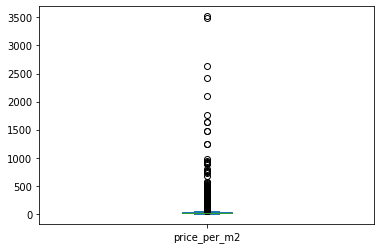

In [ ]:
df['price_per_m2'].plot(kind='box')

In [ ]:
priceperm_outliers=df.query('price_per_m2 >= 2000')
priceperm_outliers

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2
715,Properties for sale in Bo Sands,New Administrative Capital,3518.221,Chalet,1,2,1.0,3518.221
2926,In New Capital Book Your Store in Audaz Mall S...,10,3485.000,Store,1,4,1.0,3485.000
3287,Stores without Down Payment for sale in Audaz ...,New Cairo,2635.000,Store,1,3,1.0,2635.000
9760,Details About Audaz New Capital 42m Stores,New Administrative Capital,4200.000,Store,1,4,2.0,2100.000
10618,Take Over Your Store In Citadel New Capital,8,2423.000,Store,1,9,1.0,2423.000


>> We can notice some extreme price per meter outliers in New Cairo and New Capital for stores and one chalet, removing them would help in better understanding the price per meter ditribution

In [ ]:
priceperm_outliers=df.query('price_per_m2 >= 2000').index
df.drop(priceperm_outliers, inplace=True)

In [ ]:
df.describe()

,Price,BedRooms,BathRooms,Area,price_per_m2
count,11864.000000,11864.000000,11864.000000,11864.000000,11864.000000
mean,4666.902641,2.800067,2.270314,185.503624,31.811460
std,4748.372201,1.303345,1.087432,119.998878,56.966170
min,0.530000,1.000000,0.000000,1.000000,0.004077
25%,2100.000000,2.000000,1.000000,109.000000,14.772727
50%,3300.000000,3.000000,2.000000,163.000000,20.689655
75%,5476.448750,4.000000,3.000000,235.000000,32.000000
max,80000.000000,9.000000,9.000000,987.000000,1760.000000


In [ ]:
df['Unit_Type'].unique()

array(['Apartment', 'Town', 'Villa', 'Office', 'Clinic', 'Chalet',
       'Studio', 'Store', 'Duplex', 'Twin', 'Penthouse', 'Pharmacy',
       'Unknown'], dtype=object)

In [ ]:
undf.query('Unit_Type == "Unknown"')

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2,bus_or_res,price_levels
440,Pay 10% and Receive a Shalet in Zahra Memaar A...,New Cairo,1485.000,Unknown,2,2,90.0,16.500000,Residential,low_price
1216,For Sale 262 Meters in 6th of October Compound...,9,5094.000,Unknown,4,2,262.0,19.442748,Residential,high_price
3178,Units of 136m for sale in Rivan Compound from ...,8,2294.415,Unknown,2,2,136.0,16.870699,Residential,moderate_price
4789,For Sale 262 Meters in 6th of October Compound...,6,5094.000,Unknown,4,2,262.0,19.442748,Residential,high_price
5422,Your Store is 47m In FrontGate Mall,New Cairo,2546.000,Unknown,1,1,47.0,54.170213,Residential,moderate_price
11108,Your Office 320 Meters In Infinity Tower By In...,8,23500.000,Unknown,5,3,320.0,73.437500,Residential,expensive


In [ ]:
def BusOrRes(x):
  bus=('Clinic', 'Pharmacy', 'Store','Office')
  res=('Apartment','Town','Villa','Twin', 'Chalet','Penthouse','Duplex', 'Studio')
  if str.x in bus:
    y='Business'
    bus_or_res.append(y)
    print(bus_or_res)
  elif str.x in res:
    z='Residential'
    bus_or_res.append(z)
    print(bus_or_res)
bus_or_res=map(BusOrRes,df.Unit_Type)

In [ ]:
bus=('Clinic', 'Pharmacy', 'Store','Office')
res=('Apartment','Town','Villa','Twin', 'Chalet','Penthouse','Duplex', 'Studio','Unknown')
bus_or_res=[]

for index,row in df[['Unit_Type']].iteritems():
  for x in row:
    if str(x) in bus:
      x='Business'
      bus_or_res.append(x)
      #print('bus_or_res')
    elif str(x) in res:
      x='Residential'
      bus_or_res.append(x)
      #print('bus_or_res')

In [ ]:
df['bus_or_res']=bus_or_res

In [ ]:
df.head(5)

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2,bus_or_res
0,Buy Your Apartment 171m In Cresta Bella Hills,Request Details,4100.000,Apartment,3,3,171.0,23.976608,Residential
1,Get A Townhouse In Porto October Compound,New Cairo,2800.000,Town,3,3,158.0,17.721519,Residential
2,Your Dream Villa In 6 October Mountain View Ic...,7,5954.581,Villa,4,2,265.0,22.470117,Residential
3,Villas for sale in Etapa by City Edge starting...,New Cairo,8675.325,Villa,3,4,317.0,27.366956,Residential
4,Administrative units for sale in Cairo Busines...,6th October,5184.000,Office,4,2,162.0,32.000000,Business


#Exploratory Data Analysis

In [ ]:
# Create a function for barplot
def bar (df, xlabel, ylabel, title):
    ax=df.plot(kind='bar', colormap='cividis')
    fig = ax.get_figure()
    fig.set_size_inches(26,6)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=20)
    ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

# Grab the color of the bars so we can make the
# text the same color.
    
    plt.show(ax)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


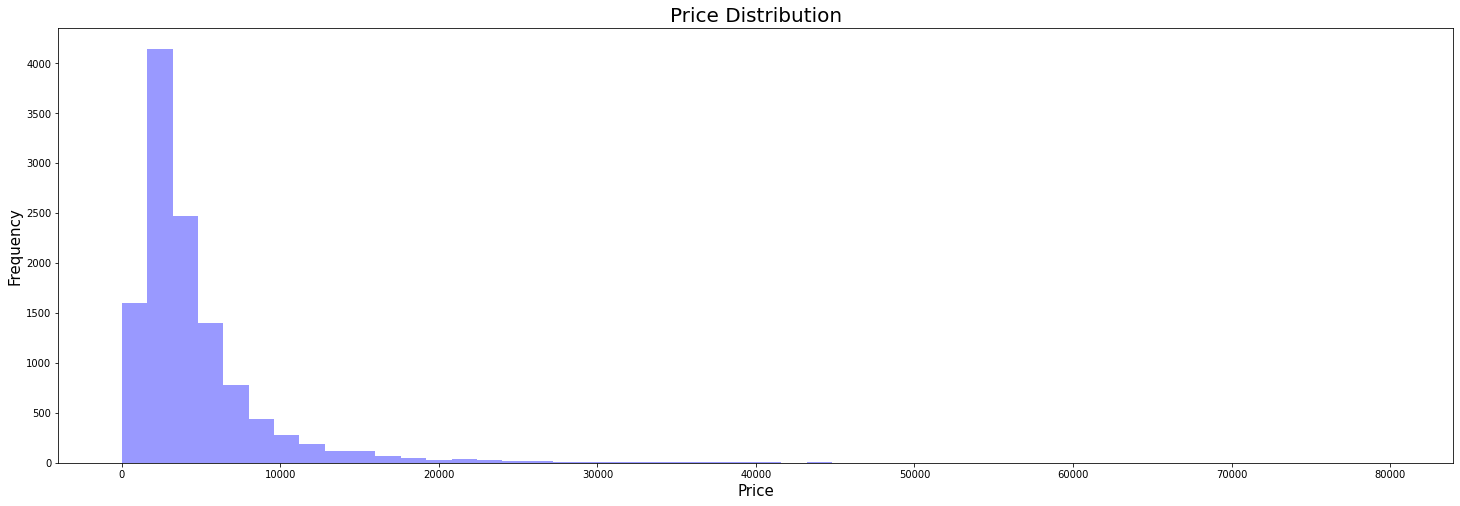

<Figure size 432x288 with 0 Axes>

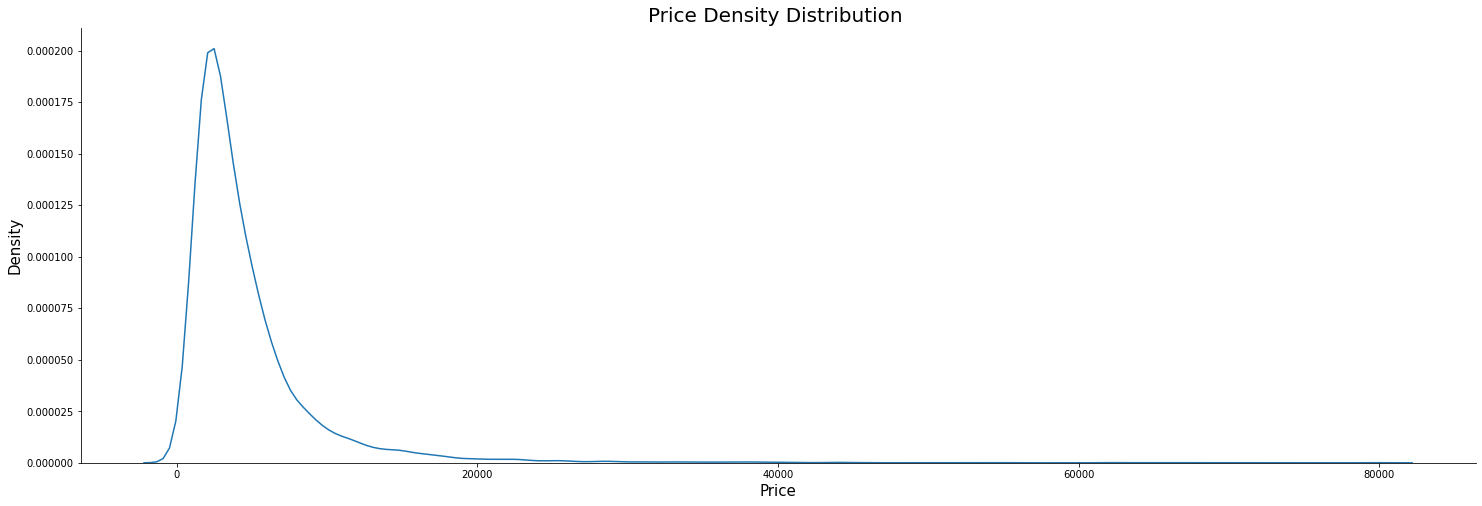

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(25,8))
sns.axes_style('whitegrid' )
sns.distplot(df.Price,
 kde= False, color="b" )
#sns.set(rc={'figure.figsize':(25,8)})
plt.title('Price Distribution', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
plt.savefig('PriceDistribution.png')

f, ax = plt.subplots(figsize=(25,8))
sns.despine(f)
sns.kdeplot(df['Price'])
plt.title('Price Density Distribution ', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()
plt.savefig('PriceDensityDistribution.png')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


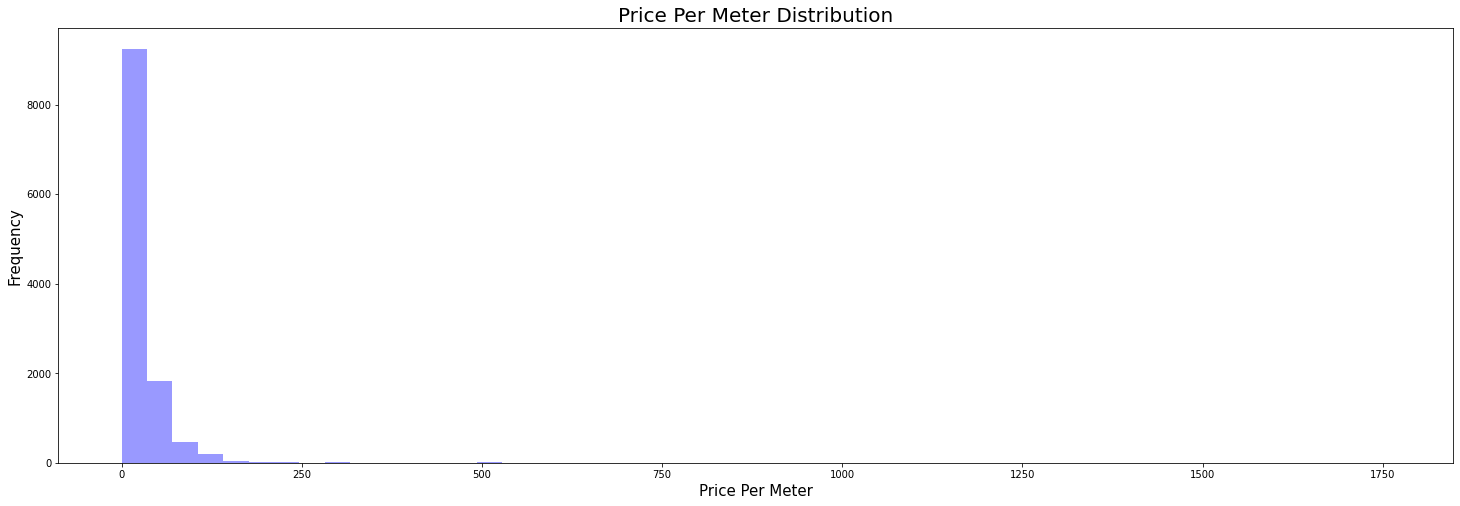

<Figure size 432x288 with 0 Axes>

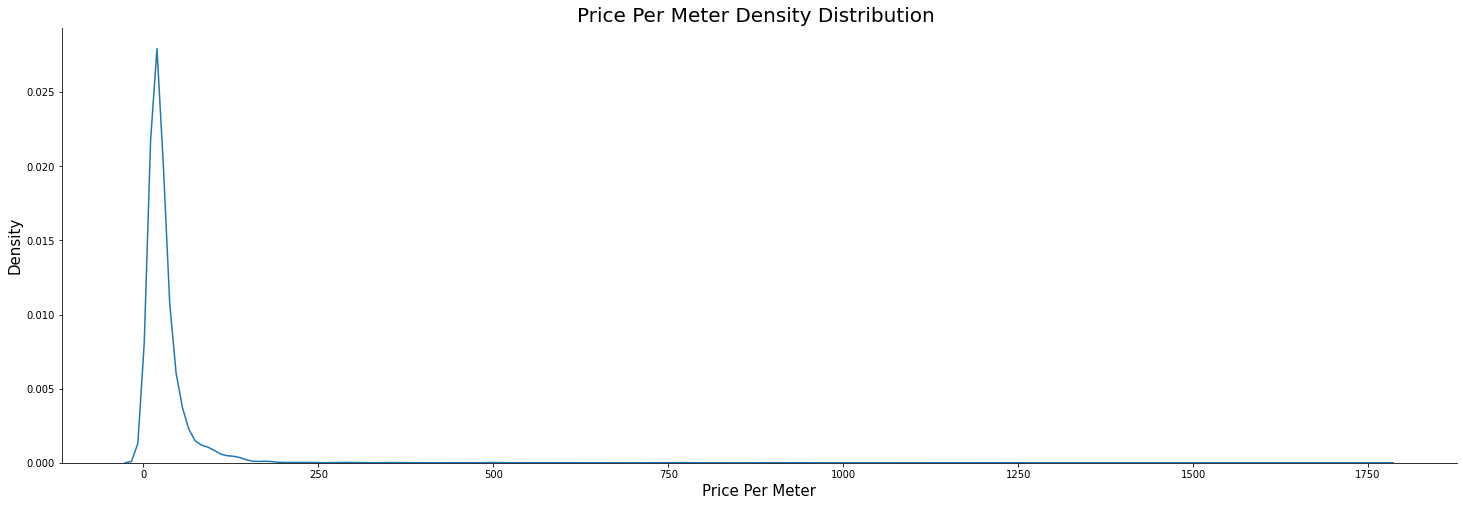

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(25,8))
sns.axes_style('whitegrid' )
sns.distplot(df.price_per_m2,
 kde= False, color="b" )
#sns.set(rc={'figure.figsize':(25,8)})
plt.title('Price Per Meter Distribution', fontsize=20)
plt.xlabel('Price Per Meter', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
plt.savefig('Pricem2Distribution.png')

f, ax = plt.subplots(figsize=(25,8))
sns.despine(f)
sns.kdeplot(df['price_per_m2'])
plt.title('Price Per Meter Density Distribution ', fontsize=20)
plt.xlabel('Price Per Meter', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()
plt.savefig('Pricem2DensityDistribution.png')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


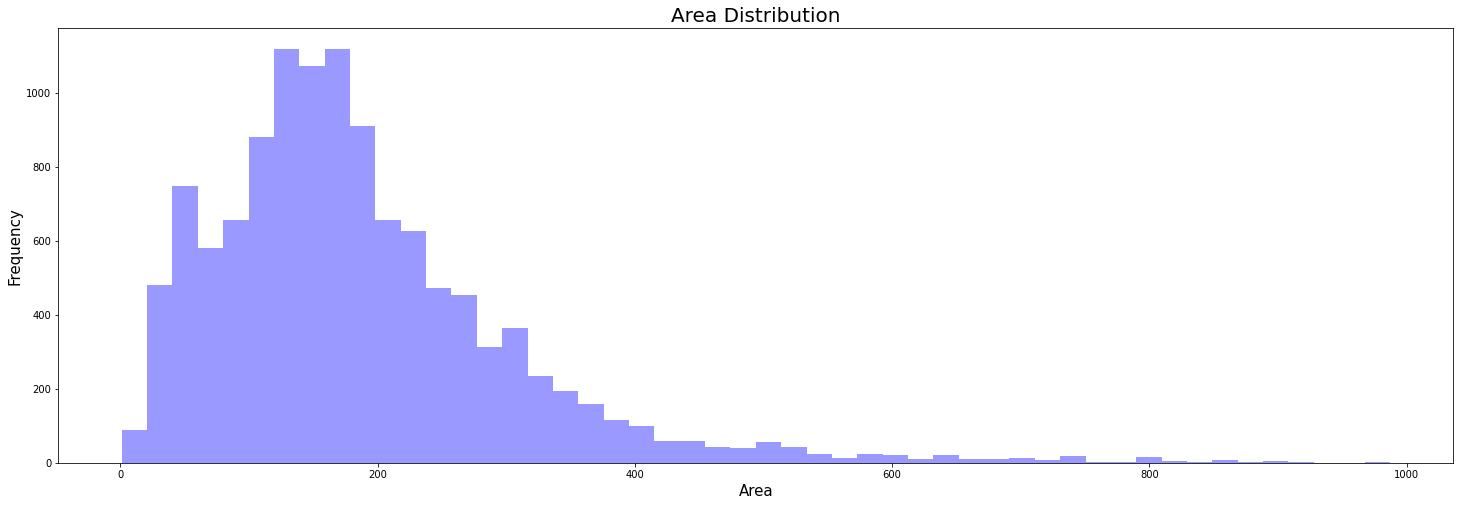

<Figure size 432x288 with 0 Axes>

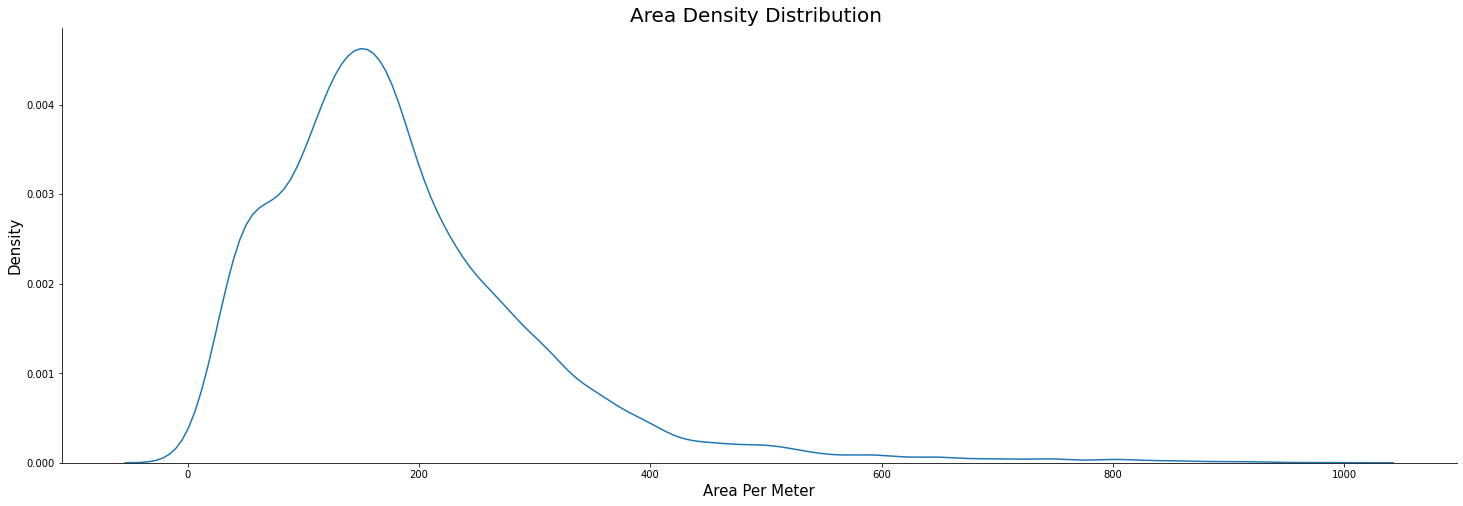

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(25,8))
sns.axes_style('whitegrid' )
sns.distplot(df.Area,
 kde= False, color="b" )
#sns.set(rc={'figure.figsize':(25,8)})
plt.title('Area Distribution', fontsize=20)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
plt.savefig('AreaDistribution.png')

f, ax = plt.subplots(figsize=(25,8))
sns.despine(f)
sns.kdeplot(df['Area'])
plt.title('Area Density Distribution ', fontsize=20)
plt.xlabel('Area Per Meter', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()
plt.savefig('AreaDensityDistribution.png')

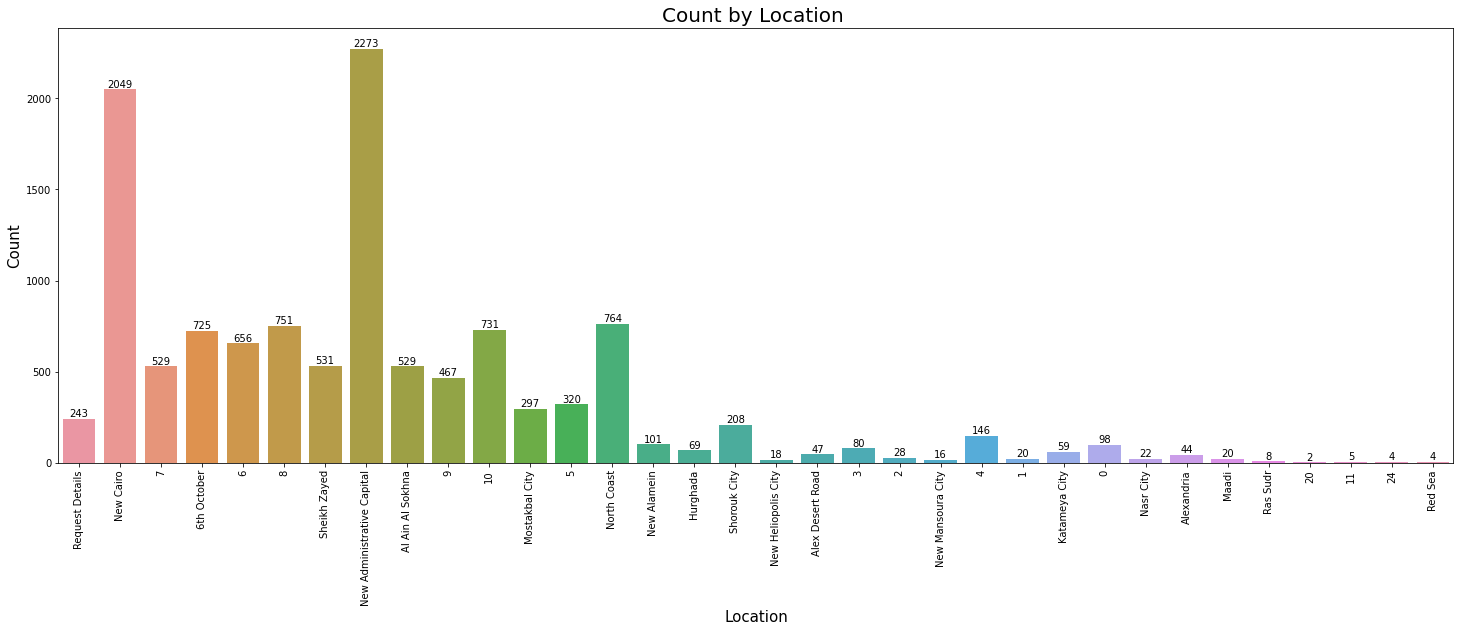

In [ ]:
f, ax = plt.subplots(figsize=(25,8))
ax=sns.countplot(x=df["Location"])
#sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.title('Count by Location ', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

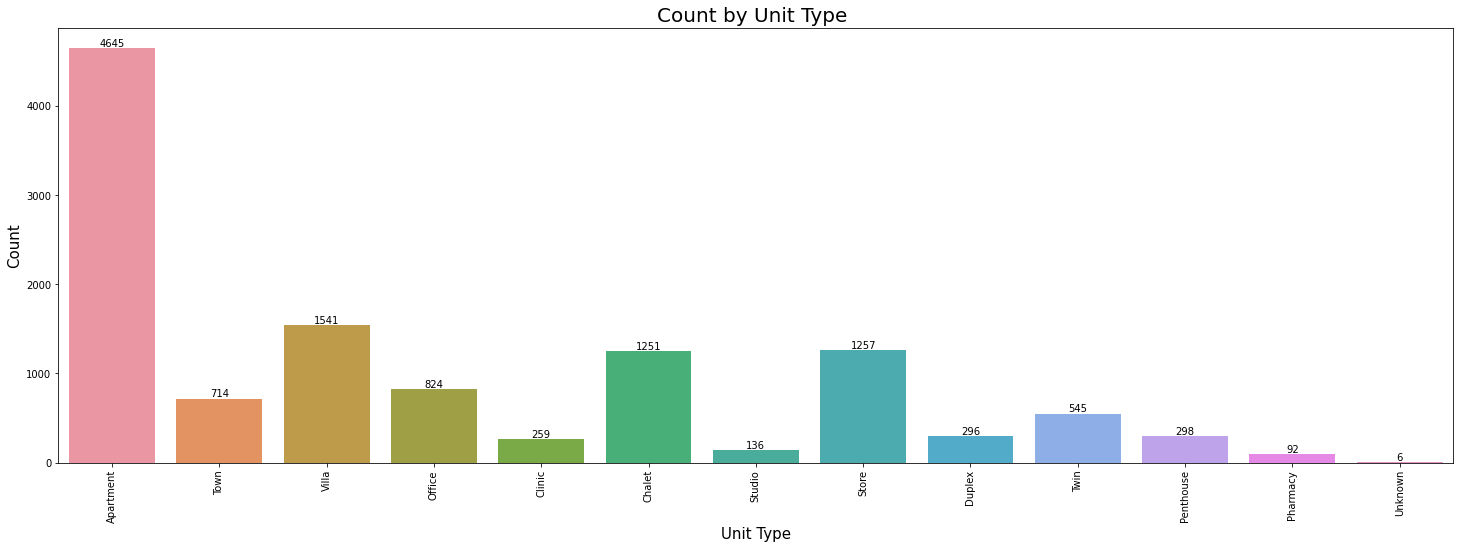

In [ ]:
f, ax = plt.subplots(figsize=(25,8))
ax=sns.countplot(x=df["Unit_Type"])
#sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.title('Count by Unit Type ', fontsize=20)
plt.xlabel('Unit Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

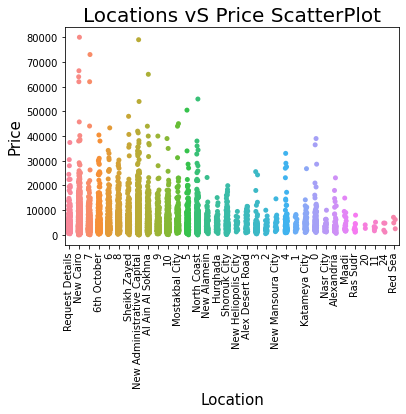

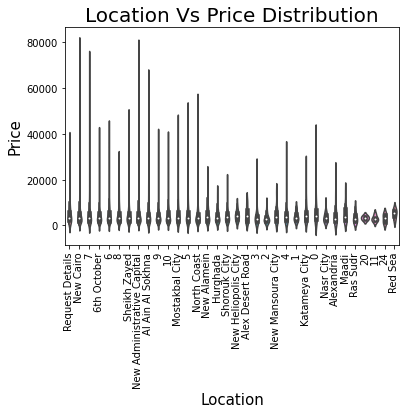

In [ ]:
sns.stripplot(x= 'Location', y= 'Price', data=df,cmap='viridis')
plt.title("Locations vS Price ScatterPlot", fontsize=20 )
plt.ylabel( "Price", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

sns.violinplot(data=df, x="Location", y="Price", cmap='viridis')
plt.title("Location Vs Price Distribution", fontsize=20 )
plt.ylabel( "Price", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

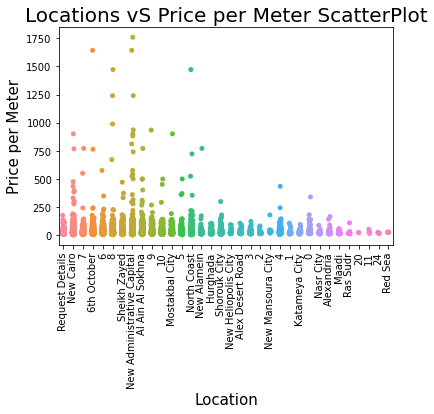

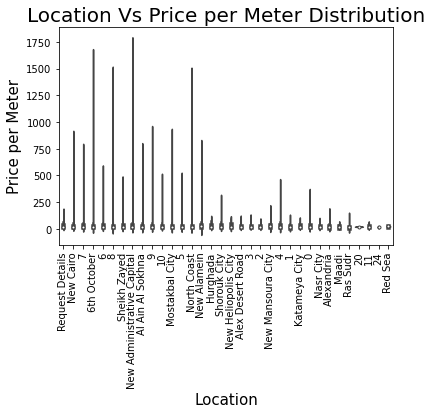

In [ ]:
sns.stripplot(x= 'Location', y= 'price_per_m2', data=df,cmap='viridis')
plt.title("Locations vS Price per Meter ScatterPlot", fontsize=20 )
plt.ylabel( "Price per Meter", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

sns.violinplot(data=df, x="Location", y="price_per_m2", cmap='viridis')
plt.title("Location Vs Price per Meter Distribution", fontsize=20 )
plt.ylabel( "Price per Meter", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

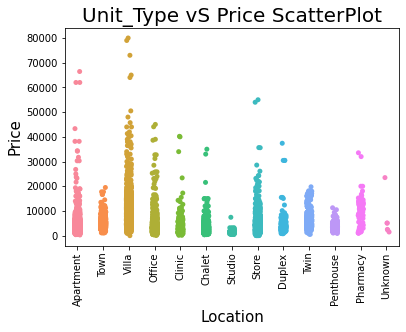

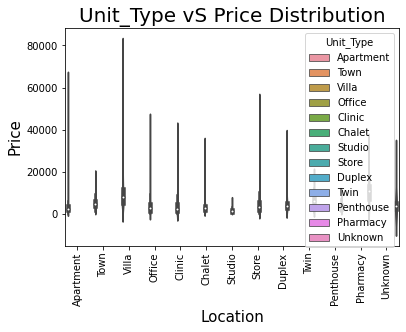

In [ ]:
sns.stripplot(x= 'Unit_Type', y= 'Price', data=df,cmap='viridis')
plt.title("Unit_Type vS Price ScatterPlot", fontsize=20 )
plt.ylabel( "Price", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

sns.violinplot(data=df, x="Unit_Type", y="Price", hue="Unit_Type", cmap='viridis')
plt.title("Unit_Type vS Price Distribution", fontsize=20 )
plt.ylabel( "Price", fontsize=15)
plt.xlabel( "Location",fontsize=15)
plt.xticks(rotation = 90)
plt.show()


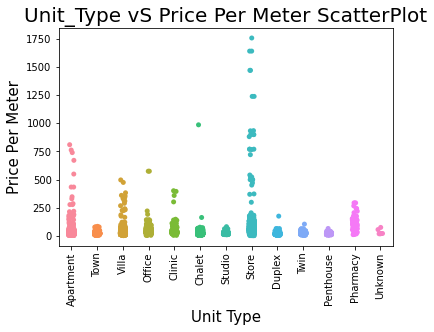

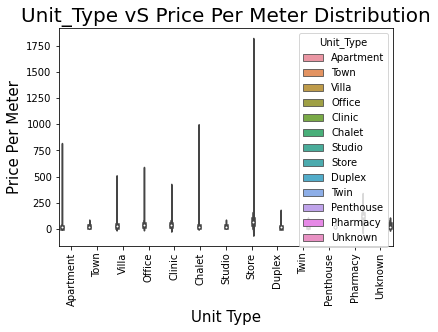

In [ ]:
sns.stripplot(x= 'Unit_Type', y= 'price_per_m2', data=df,cmap='viridis')
plt.title("Unit_Type vS Price Per Meter ScatterPlot", fontsize=20 )
plt.ylabel( "Price Per Meter", fontsize=15)
plt.xlabel( "Unit Type",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

sns.violinplot(data=df, x="Unit_Type", y="price_per_m2", hue="Unit_Type", cmap='viridis')
plt.title("Unit_Type vS Price Per Meter Distribution", fontsize=20 )
plt.ylabel( "Price Per Meter", fontsize=15)
plt.xlabel( "Unit Type",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Correlation HeatMap')

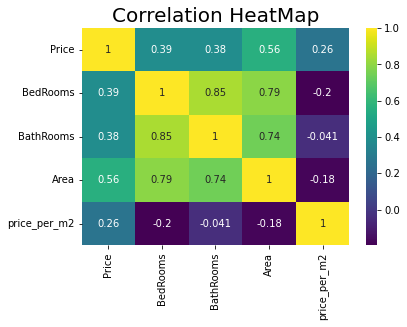

In [ ]:
sns.heatmap(df.drop(['Title'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation HeatMap', fontsize=20)

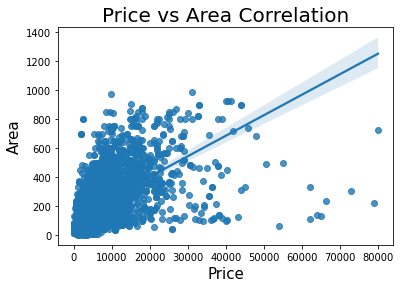

In [ ]:
sns.regplot(x='Price', y='Area', data=df)
plt.title("Price vs Area Correlation", fontsize=20 )
plt.ylabel( "Area", fontsize=15)
plt.xlabel( "Price",fontsize=15)
plt.savefig('Price vs Area Correlation.png')

Text(0.5, 0, 'Price')

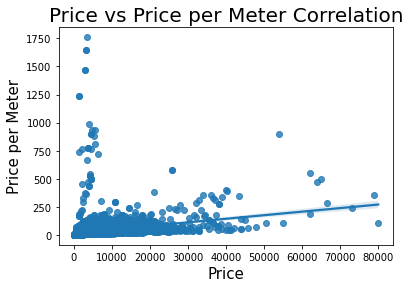

In [ ]:
sns.regplot(x='Price', y='price_per_m2', data=df)
plt.title("Price vs Price per Meter Correlation", fontsize=20 )
plt.ylabel( "Price per Meter", fontsize=15)
plt.xlabel( "Price",fontsize=15)

Text(0.5, 0, 'Area')

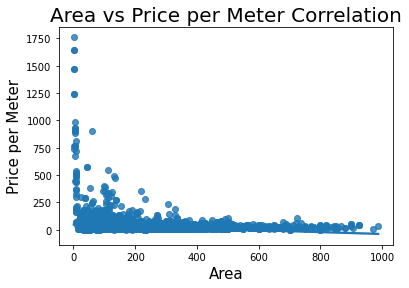

In [ ]:
sns.regplot(x='Area', y='price_per_m2', data=df)
plt.title("Area vs Price per Meter Correlation", fontsize=20 )
plt.ylabel( "Price per Meter", fontsize=15)
plt.xlabel( "Area",fontsize=15)

In [ ]:
df.head(2)

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2,bus_or_res
0,Buy Your Apartment 171m In Cresta Bella Hills,Request Details,4100.0,Apartment,3,3,171.0,23.976608,Residential
1,Get A Townhouse In Porto October Compound,New Cairo,2800.0,Town,3,3,158.0,17.721519,Residential


In [ ]:
title_freq=df.Title.str.split(expand=True).stack().value_counts() 
rslt=pd.DataFrame( title_freq.nlargest(1000),columns=['Frequency'])

In [ ]:
rslt.to_csv('title_freq.csv')

In [ ]:
rslt.head(20)

,Frequency
in,7564
In,4431
With,3206
Sale,2677
New,2548
For,2518
Your,2441
Apartment,2405
for,2319
Compound,2020


In [ ]:
unit_type_Price=df.groupby('Unit_Type')['Price'].mean().sort_values(ascending=False)

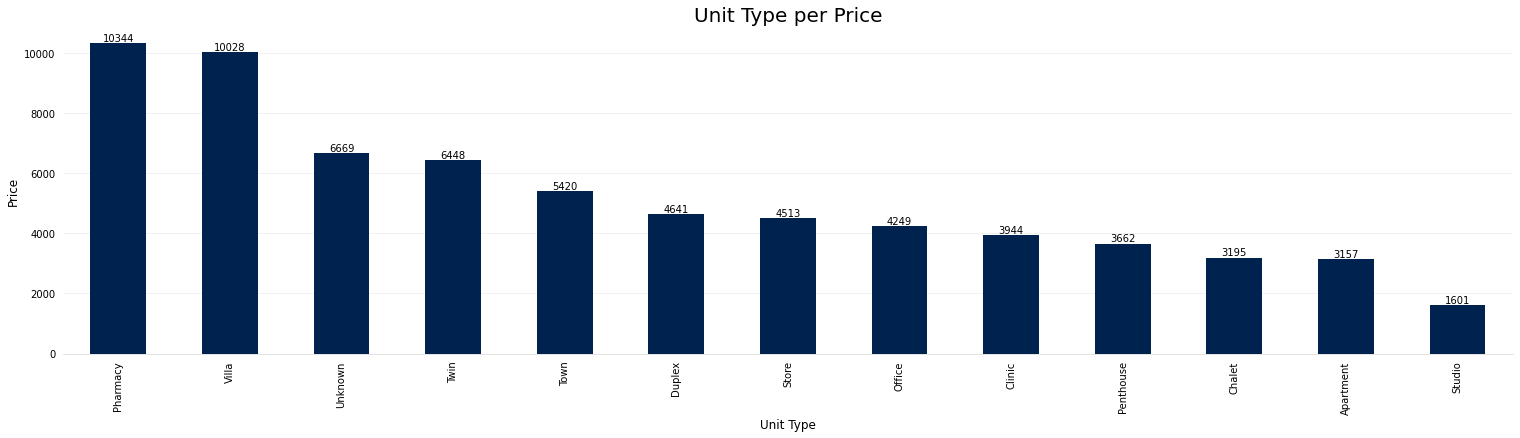

In [ ]:
bar(unit_type_Price, 'Unit Type', 'Price', 'Unit Type per Price')

In [ ]:
unit_type_Area=df.groupby('Unit_Type')['Area'].mean().sort_values(ascending=False)

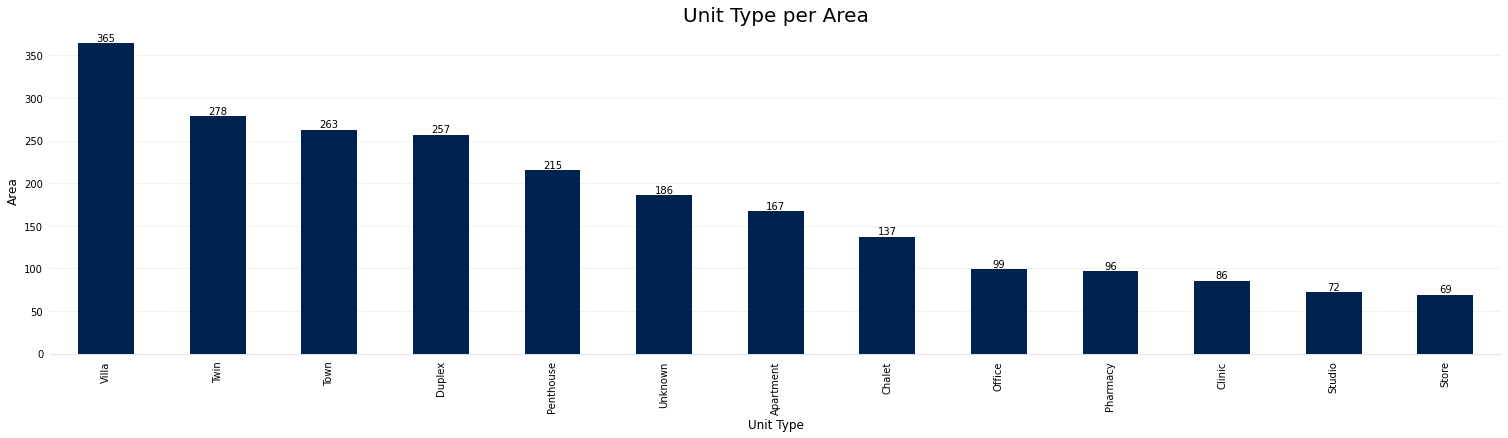

In [ ]:
bar(unit_type_Area, 'Unit Type', 'Area', 'Unit Type per Area')

In [ ]:
unit_type_meter=df.groupby('Unit_Type')['price_per_m2'].mean().sort_values(ascending=False)

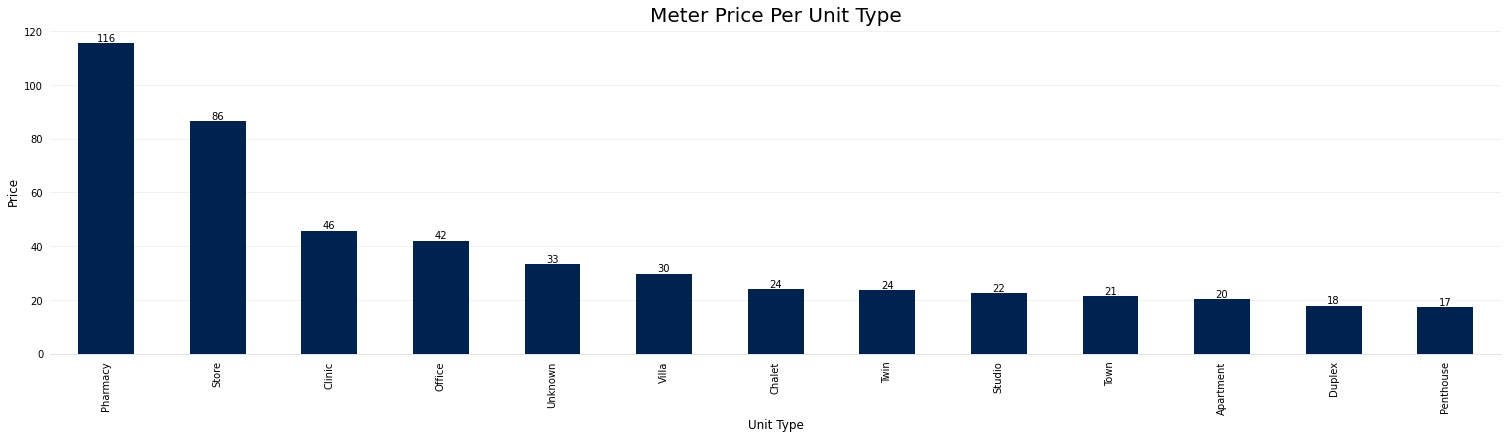

In [ ]:
bar(unit_type_meter, 'Unit Type', 'Price', 'Meter Price Per Unit Type')

In [ ]:
location_price=df.groupby('Location')['Price'].mean().sort_values(ascending=False)

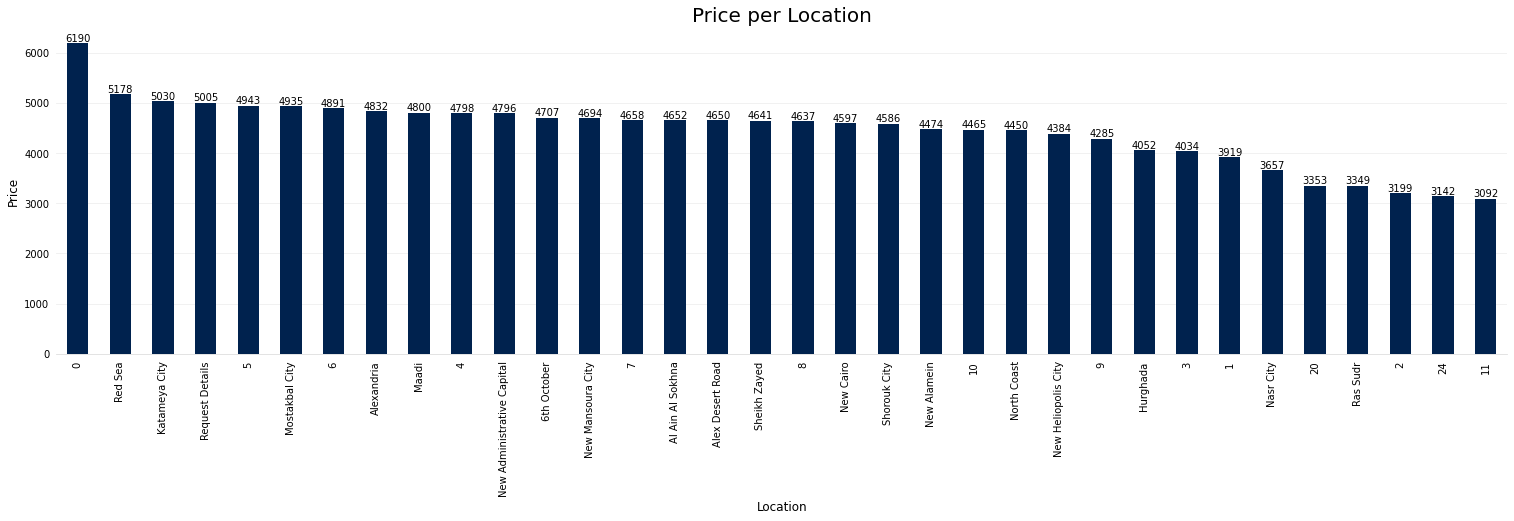

In [ ]:
bar(location_price, 'Location', 'Price', 'Price per Location')

In [ ]:
location_meter=df.groupby('Location')['price_per_m2'].mean().sort_values(ascending=False)

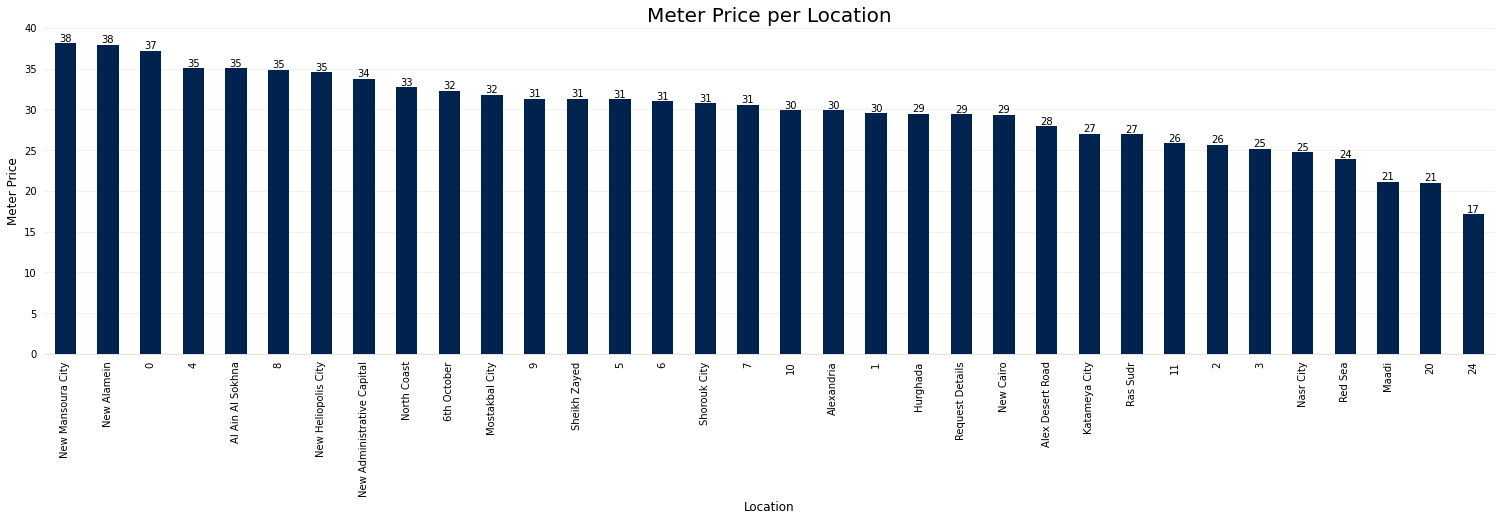

In [ ]:
bar(location_meter, 'Location', 'Meter Price', 'Meter Price per Location')

In [ ]:
location_area=df.groupby('Location')['Area'].mean().sort_values(ascending=False)

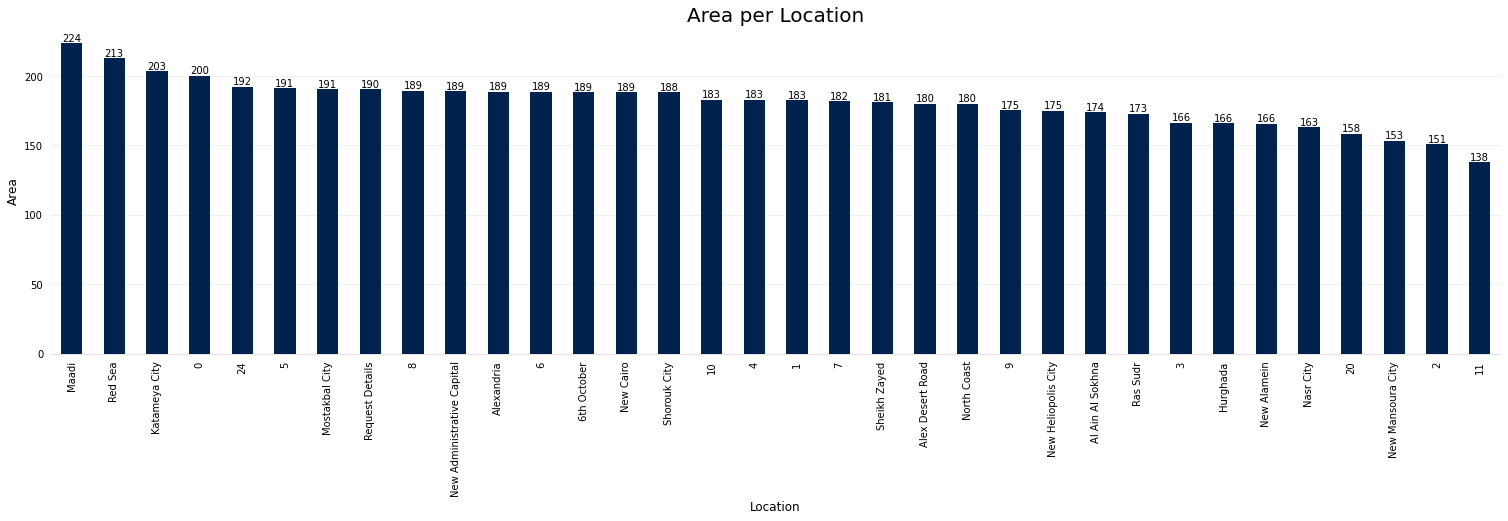

In [ ]:
bar(location_area, 'Location', 'Area', 'Area per Location')

In [ ]:
df[df.Title.str.contains("Business")]

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2,bus_or_res
4,Administrative units for sale in Cairo Busines...,6th October,5184.0,Office,4,2,162.0,32.000000,Business
46,Special Offer On The Meter Price With Finishin...,Hurghada,6552.0,Store,1,1,78.0,84.000000,Business
54,Office With ​​170m In Mivida Business Park Mal...,6th October,4750.0,Office,1,1,170.0,27.941176,Business
61,Properties with 45m for Sale in Opal Business ...,7,3825.0,Store,1,1,45.0,85.000000,Business
109,Buy Your Store With 36m In I Business Park The...,New Cairo,722.2,Store,1,1,36.0,20.061111,Business
...,...,...,...,...,...,...,...,...,...
11674,"In Installments, Buy An Office In Heritage Bus...",New Administrative Capital,3100.0,Office,2,2,110.0,28.181818,Business
11701,Office For Sale With ‎Immediate Delivery At Bu...,7,1792.0,Office,1,1,56.0,32.000000,Business
11810,Office With 183m² In Three Square Business Tow...,North Coast,7320.0,Office,3,2,183.0,40.000000,Business
11887,Take Over Your Office In Pyramids Business Tow...,Alexandria,3800.0,Office,1,1,123.0,30.894309,Business


In [ ]:
df.corr()

,Price,BedRooms,BathRooms,Area,price_per_m2
Price,1.000000,0.386370,0.383356,0.559805,0.264046
BedRooms,0.386370,1.000000,0.849154,0.791402,-0.197502
BathRooms,0.383356,0.849154,1.000000,0.738673,-0.041354
Area,0.559805,0.791402,0.738673,1.000000,-0.180568
price_per_m2,0.264046,-0.197502,-0.041354,-0.180568,1.000000


Text(0.5, 1.0, 'Area Vs Price')

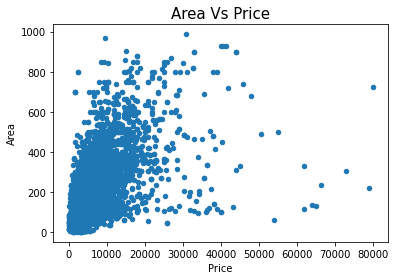

In [ ]:
df.plot(x='Price',y='Area', kind='scatter')
plt.title('Area Vs Price', fontsize=15)

<AxesSubplot:xlabel='Price', ylabel='price_per_m2'>

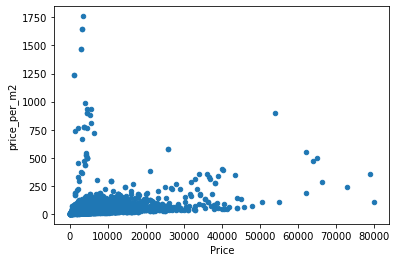

In [ ]:
df.plot(x='Price',y='price_per_m2', kind='scatter')

<AxesSubplot:xlabel='Area', ylabel='price_per_m2'>

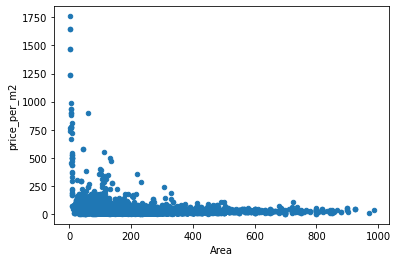

In [ ]:
df.plot(x='Area',y='price_per_m2', kind='scatter')

In [ ]:
Price_type_location=df.groupby(['Unit_Type','Location'])['Price'].mean()
Price_type_location=Price_type_location.nlargest(20)

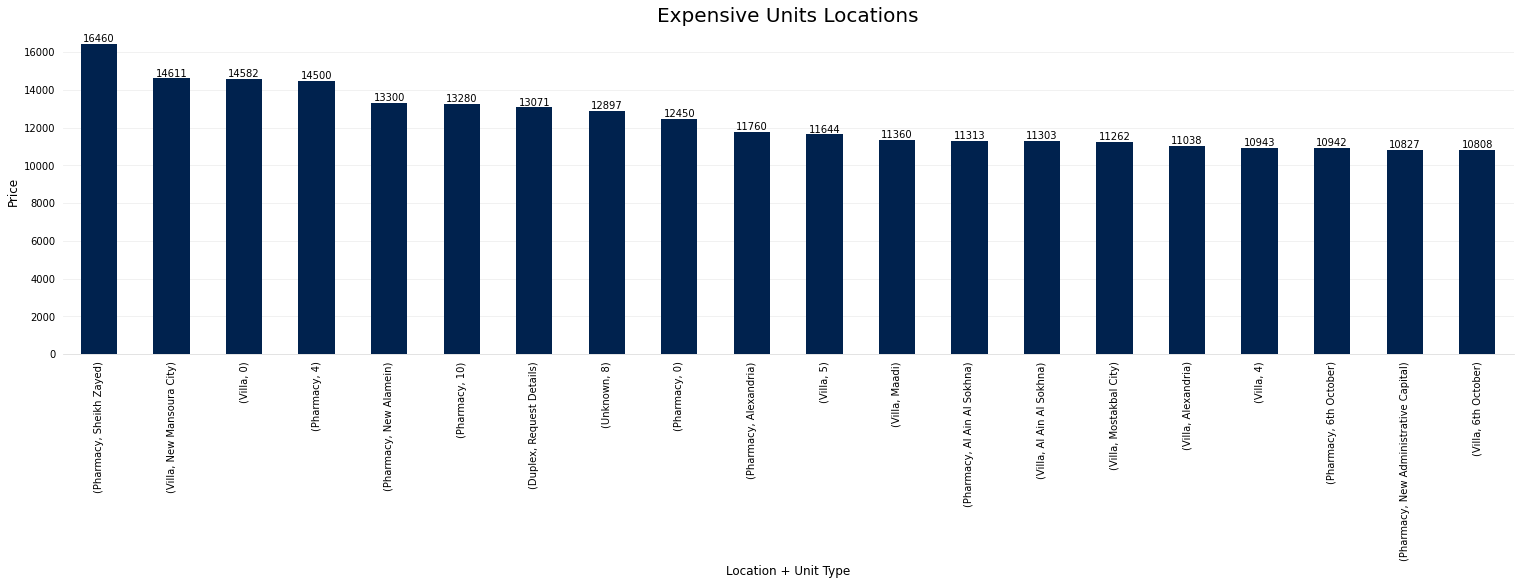

In [ ]:
bar(Price_type_location, 'Location + Unit Type', 'Price', 'Expensive Units Locations')

In [ ]:
cheap_locations=df.groupby(['Unit_Type','Location'])['Price'].mean()
cheap_locations=cheap_locations.nsmallest(20)

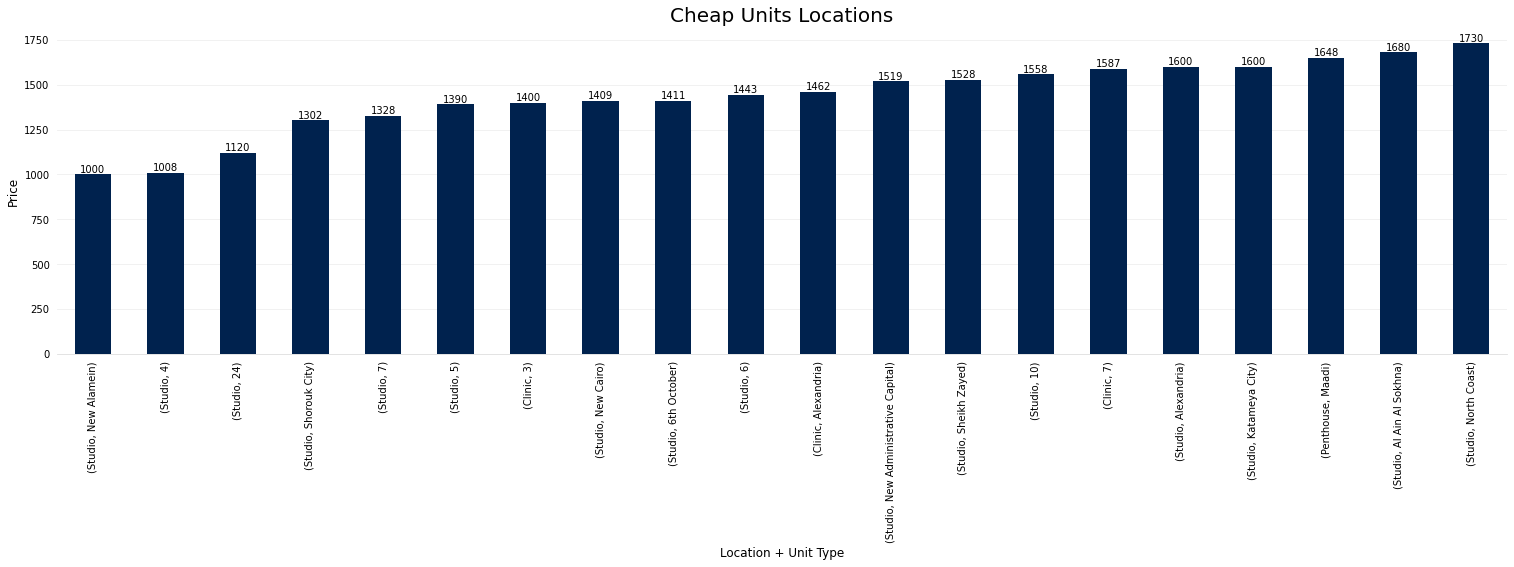

In [ ]:
bar(cheap_locations, 'Location + Unit Type', 'Price', 'Cheap Units Locations')

In [ ]:
price_meter=df.groupby(['Unit_Type','Location'])['price_per_m2'].mean()
price_meter=price_meter.nlargest(20)

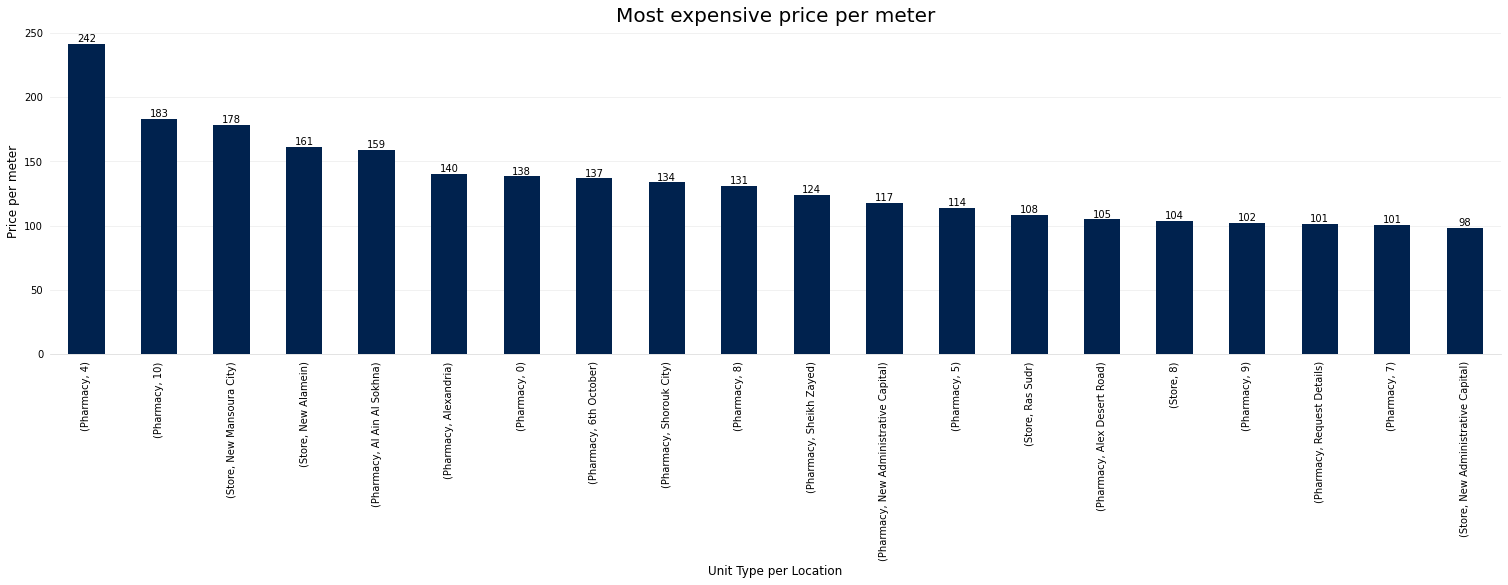

In [ ]:
bar(price_meter, 'Unit Type per Location', 'Price per meter', 'Most expensive price per meter')

In [ ]:
price_meter_cheap=df.groupby(['Unit_Type','Location'])['price_per_m2'].mean()
price_meter_cheap=price_meter_cheap.nsmallest(20)

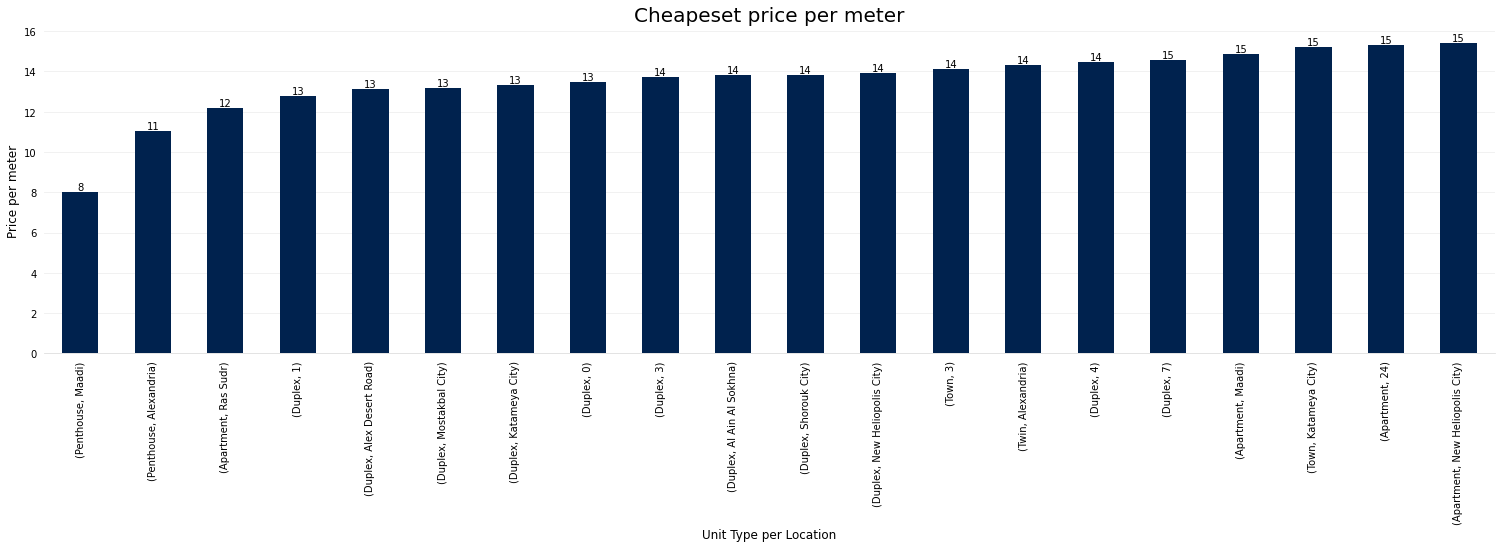

In [ ]:
bar(price_meter_cheap, 'Unit Type per Location', 'Price per meter', 'Cheapeset price per meter')

In [ ]:
smallest_area=df.groupby(['Unit_Type','Location'])['Area'].mean()
smallest_area=smallest_area.nsmallest(20)

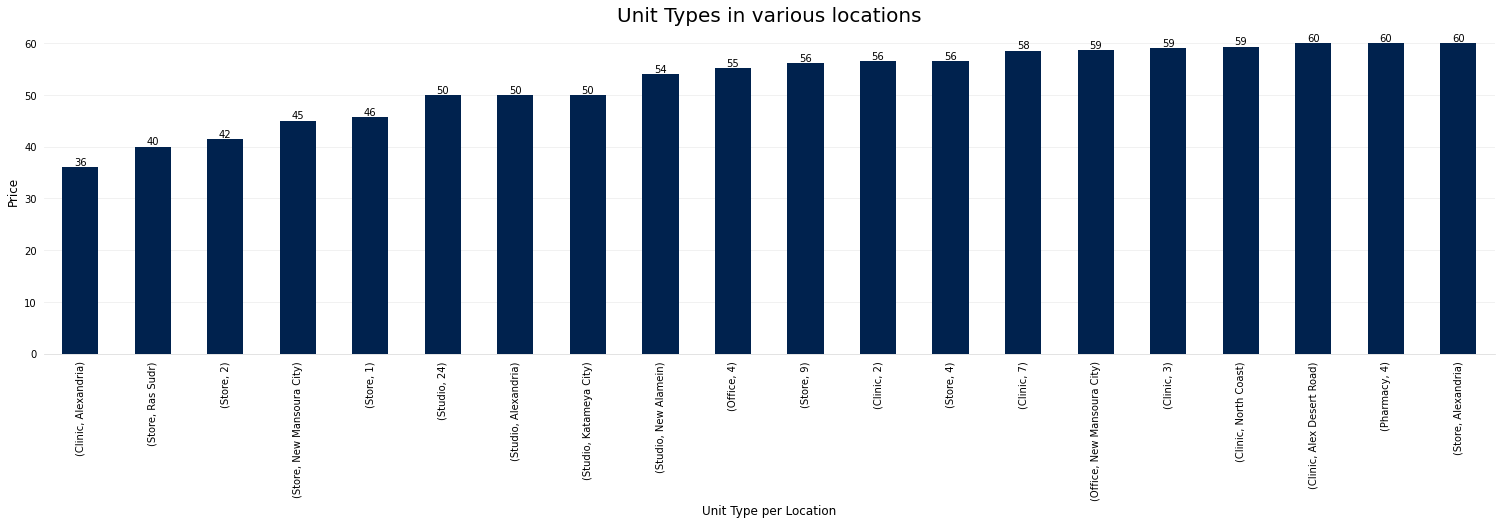

In [ ]:
bar(smallest_area, 'Unit Type per Location', 'Price', 'Unit Types in various locations')

In [ ]:
large_area=df.groupby(['Unit_Type','Location'])['Area'].mean()
large_area=large_area.nlargest(20)

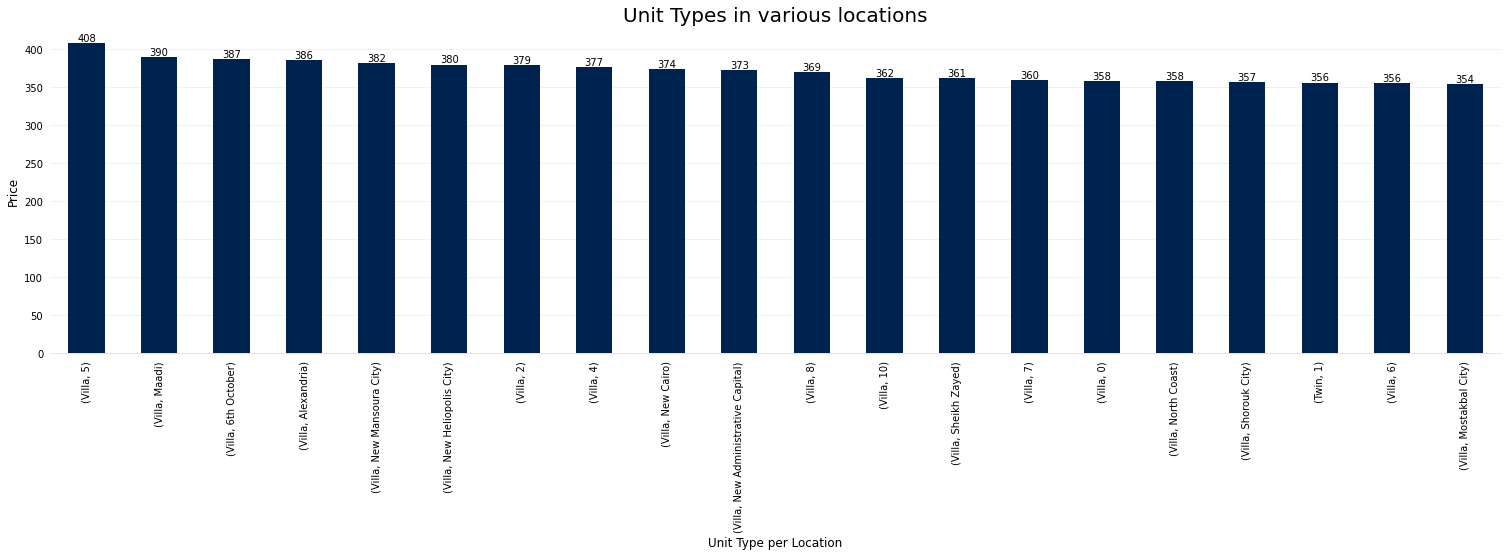

In [ ]:
bar(large_area, 'Unit Type per Location', 'Price', 'Unit Types in various locations')

<function matplotlib.pyplot.show(close=None, block=None)>

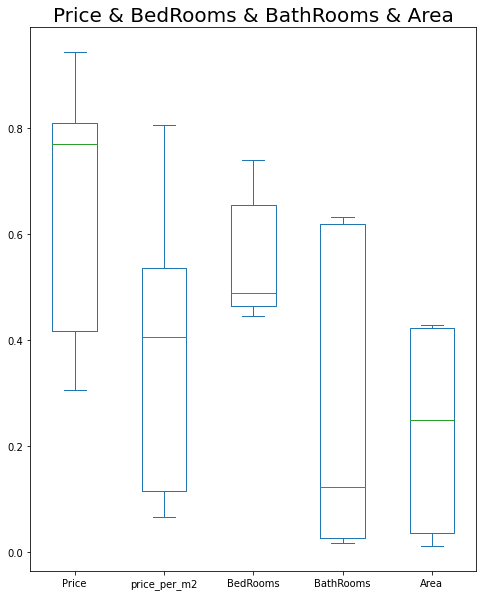

In [ ]:
boxplot = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ["Price", "price_per_m2",	"BedRooms",	"BathRooms",	"Area"])
ax = boxplot.plot(kind='box')
fig = ax.get_figure()
fig.set_size_inches(8, 10)
ax.set_title('Price & BedRooms & BathRooms & Area', fontsize=20)
plt.show

In [ ]:
df.pivot_table(columns= ['Unit_Type'], index=['Location'], aggfunc={'Unit_Type':'count'}, fill_value=0)

Unit_Type                                        \
Unit_Type                  Apartment Chalet Clinic Duplex Office Penthouse   
Location                                                                     
0                                 35      7      4      3      6         3   
1                                  8      1      1      1      0         0   
10                               274     80     19     21     60        12   
11                                 4      1      0      0      0         0   
2                                 12      5      2      3      0         0   
20                                 1      1      0      0      0         0   
24                                 3      0      0      0      0         0   
3                                 34      6      2      2     10         3   
4                                 49     18      5      2      5         5   
5                                128     26     10      9     24         7   
6                                253     75     10     14     45        18   
6th October                      290     79     16     17     37        16   
7                                200     58      6      8     48        12   
8                                293     81     19     18     45        17   
9                                183     49     11     10     31        18   
Al Ain Al Sokhna                 222     63      9     12     32        10   
Alex Desert Road                  18      7      1      1      2         1   
Alexandria                        16      7      1      0      3         2   
Hurghada                          26      7      1      3      6         3   
Katameya City                     28      5      1      1      3         0   
Maadi                             13      0      0      0      2         1   
Mostakbal City                   117     37      5      9     19         6   
Nasr City                         11      2      0      1      2         0   
New Administrative Capital       881    232     51     53    161        61   
New Alamein                       37     10      1      5     14         0   
New Cairo                        825    218     44     56    148        52   
New Heliopolis City                6      2      0      1      2         0   
New Mansoura City                  2      1      0      2      3         0   
North Coast                      304     68     17     24     52        24   
Ras Sudr                           5      0      0      0      0         0   
Red Sea                            1      0      0      0      0         0   
Request Details                   83     29      6      7     20         6   
Sheikh Zayed                     211     56     12      6     35        16   
Shorouk City                      72     20      5      7      9         5   

                                                                          
Unit_Type                  Pharmacy Store Studio Town Twin Unknown Villa  
Location                                                                  
0                                 1     7      2   10    4       0    16  
1                                 0     3      0    2    1       0     3  
10                                3    80      9   30   47       0    96  
11                                0     0      0    0    0       0     0  
2                                 0     4      0    0    0       0     2  
20                                0     0      0    0    0       0     0  
24                                0     0      1    0    0       0     0  
3                                 0     6      1    2    4       0    10  
4                                 1    20      1   16    4       0    20  
5                                 4    26      6   24   13       0    43  
6                                 5    71      7   38   25       1    94  
6th October                       9    82     10   41   31       0    97  
7              

In [ ]:
df.pivot_table(columns= ['Unit_Type'], index=['Location'], aggfunc={'Price':'mean'})

Price                            \
Unit_Type                     Apartment       Chalet       Clinic   
Location                                                            
0                           3386.566971  4687.428571  2683.250000   
1                           2364.803750  3094.470000  5100.000000   
10                          3118.937033  3492.156800  4001.229053   
11                          3127.843250  2950.000000          NaN   
2                           2660.472167  1787.750000  1938.499500   
20                          4066.000000  2640.000000          NaN   
24                          3816.666667          NaN          NaN   
3                           2711.640059  2830.000000  1400.000000   
4                           2864.357265  4075.395000  5587.300000   
5                           2977.253867  3587.707269  6817.750000   
6                           3421.030759  3507.736733  4078.413100   
6th October                 3151.117245  3009.375063  3109.690187   
7                           3238.071460  3297.719517  1587.475000   
8                           3142.746294  3110.977160  2588.568368   
9                           2964.478393  3237.311408  3513.598273   
Al Ain Al Sokhna            2994.267631  3036.843603  8707.141333   
Alex Desert Road            3224.848833  2417.062143  3000.000000   
Alexandria                  2994.791313  3157.142857  1461.600000   
Hurghada                    2734.642885  2663.372429  5108.250000   
Katameya City               4455.911357  4061.000000  2448.000000   
Maadi                       2965.053462          NaN          NaN   
Mostakbal City              2975.144538  3337.208162  7254.599800   
Nasr City                   2566.038455  3600.000000          NaN   
New Administrative Capital  3176.962219  3178.719728  3634.886353   
New Alamein                 3690.050838  2739.673400  3000.000000   
New Cairo                   3224.188104  3228.335858  4502.452273   
New Heliopolis City         2275.850000  4541.000000          NaN   
New Mansoura City           3787.500000  4180.000000          NaN   
North Coast                 3207.540944  2619.550118  2329.676471   
Ras Sudr                    1972.101400          NaN          NaN   
Red Sea                     2490.000000          NaN          NaN   
Request Details             2785.232470  3399.712172  5073.041667   
Sheikh Zayed                3100.382630  2917.014375  3182.756417   
Shorouk City                3286.314972  2947.062500  3540.170200   

                                                                    \
Unit_Type                         Duplex       Office    Penthouse   
Location                                                             
0                            3481.149333  4089.955833  5285.490333   
1                            3358.400000          NaN          NaN   
10                           4356.678286  3730.356867  4244.186750   
11                                   NaN          NaN          NaN   
2                            6287.666667          NaN          NaN   
20                                   NaN          NaN          NaN   
24                                   NaN          NaN          NaN   
3                            3838.000000  3791.300000  3418.043333   
4                            3927.000000  1797.200000  4217.040000   
5                            4770.574000  3298.105625  3142.221429   
6                            5514.628071  5384.900867  3702.120611   
6th October                  4420.313235  3308.735459  4023.021000   
7                            3767.317625  5194.237125  3986.903583   
8                            4131.337778  3523.837444  3875.999529   
9                            3754.261000  4560.775129  4102.838889   
Al Ain Al Sokhna             3478.604167  3522.690625  3809.055900   
Alex Desert Road             3020.000000  6461.283500  5092.507000   
Alexandria                           NaN  9406.666667  2015.000000   
Hurghada  

In [ ]:
bin_edges=[0.530000,2091.875000, 3254.962000,5400.000000,336145.000000]

In [ ]:
bin_names=['low_price','moderate_price','high_price','expensive']

In [ ]:
df['price_levels'] = pd.cut(df['Price'], bin_edges, labels=bin_names)

In [ ]:
df.head(5)

,Title,Location,Price,Unit_Type,BedRooms,BathRooms,Area,price_per_m2,bus_or_res,price_levels
0,Buy Your Apartment 171m In Cresta Bella Hills,Request Details,4100.000,Apartment,3,3,171.0,23.976608,Residential,high_price
1,Get A Townhouse In Porto October Compound,New Cairo,2800.000,Town,3,3,158.0,17.721519,Residential,moderate_price
2,Your Dream Villa In 6 October Mountain View Ic...,7,5954.581,Villa,4,2,265.0,22.470117,Residential,expensive
3,Villas for sale in Etapa by City Edge starting...,New Cairo,8675.325,Villa,3,4,317.0,27.366956,Residential,expensive
4,Administrative units for sale in Cairo Busines...,6th October,5184.000,Office,4,2,162.0,32.000000,Business,high_price


In [ ]:
low_price=df.query('price_levels=="low_price"')

In [ ]:
moderate_price=df.query('price_levels=="moderate_price"')

In [ ]:
high_price=df.query('price_levels=="high_price"')

In [ ]:
expensive=df.query('price_levels=="expensive"')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


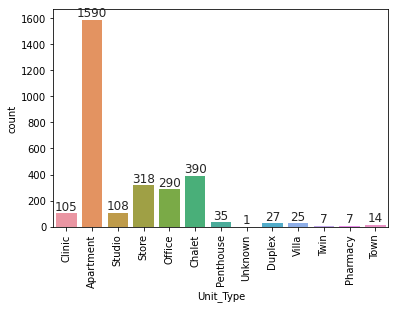

In [ ]:
ax=sns.countplot(low_price['Unit_Type'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


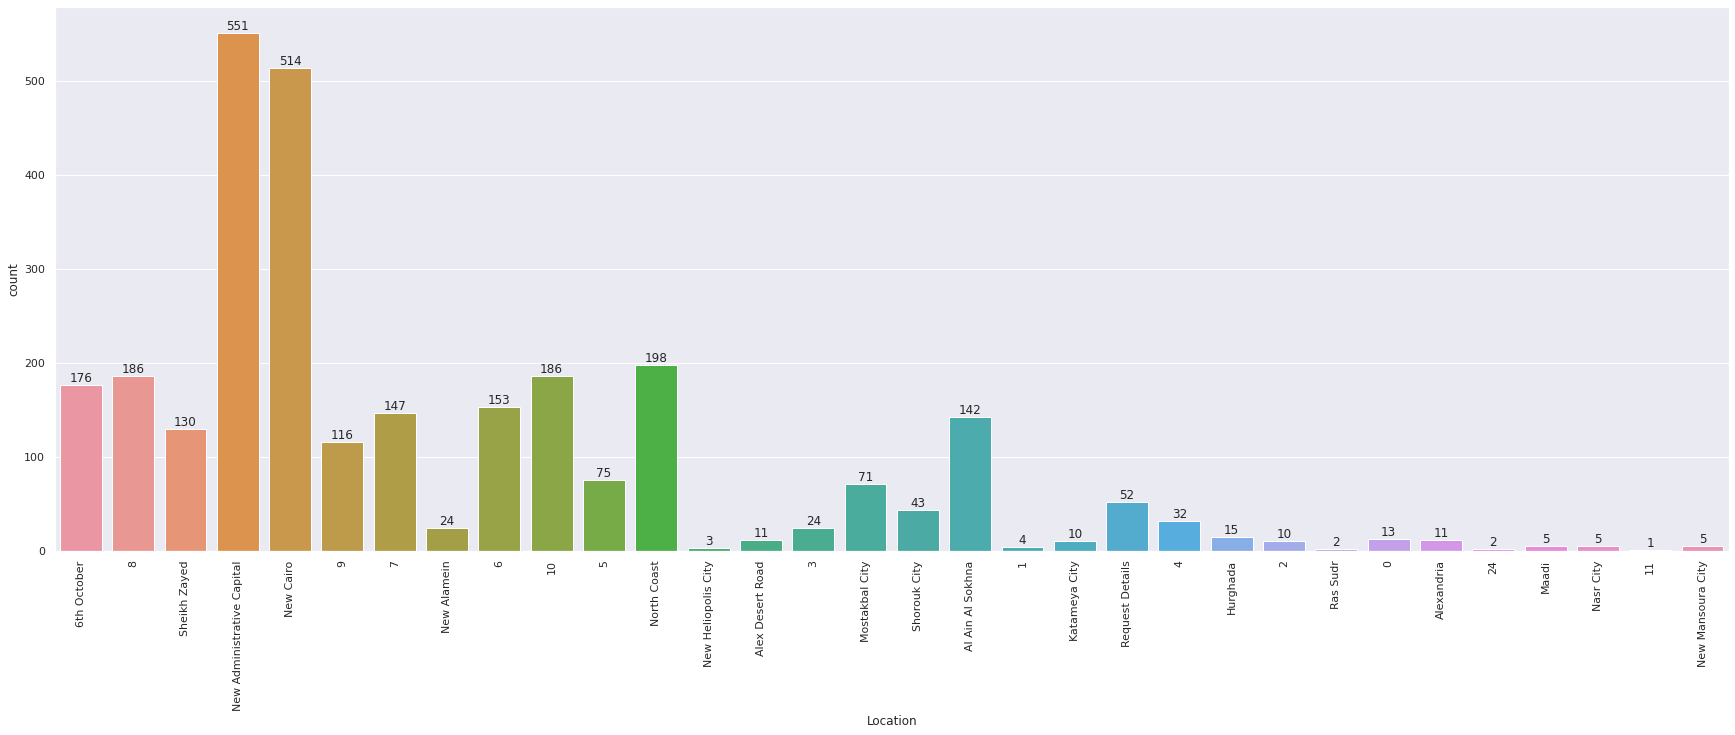

In [ ]:
ax=sns.countplot(low_price['Location'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
low_price['Area'].describe()

count    2917.000000
mean      108.446349
std        56.144798
min         1.000000
25%        63.000000
50%       110.000000
75%       144.000000
max       700.000000
Name: Area, dtype: float64

In [ ]:
low_price['BedRooms'].value_counts()

1    1001
3     951
2     854
4      96
5      12
6       3
Name: BedRooms, dtype: int64

In [ ]:
low_price['BathRooms'].value_counts()

2    1368
1    1241
3     291
4      12
0       3
7       1
5       1
Name: BathRooms, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


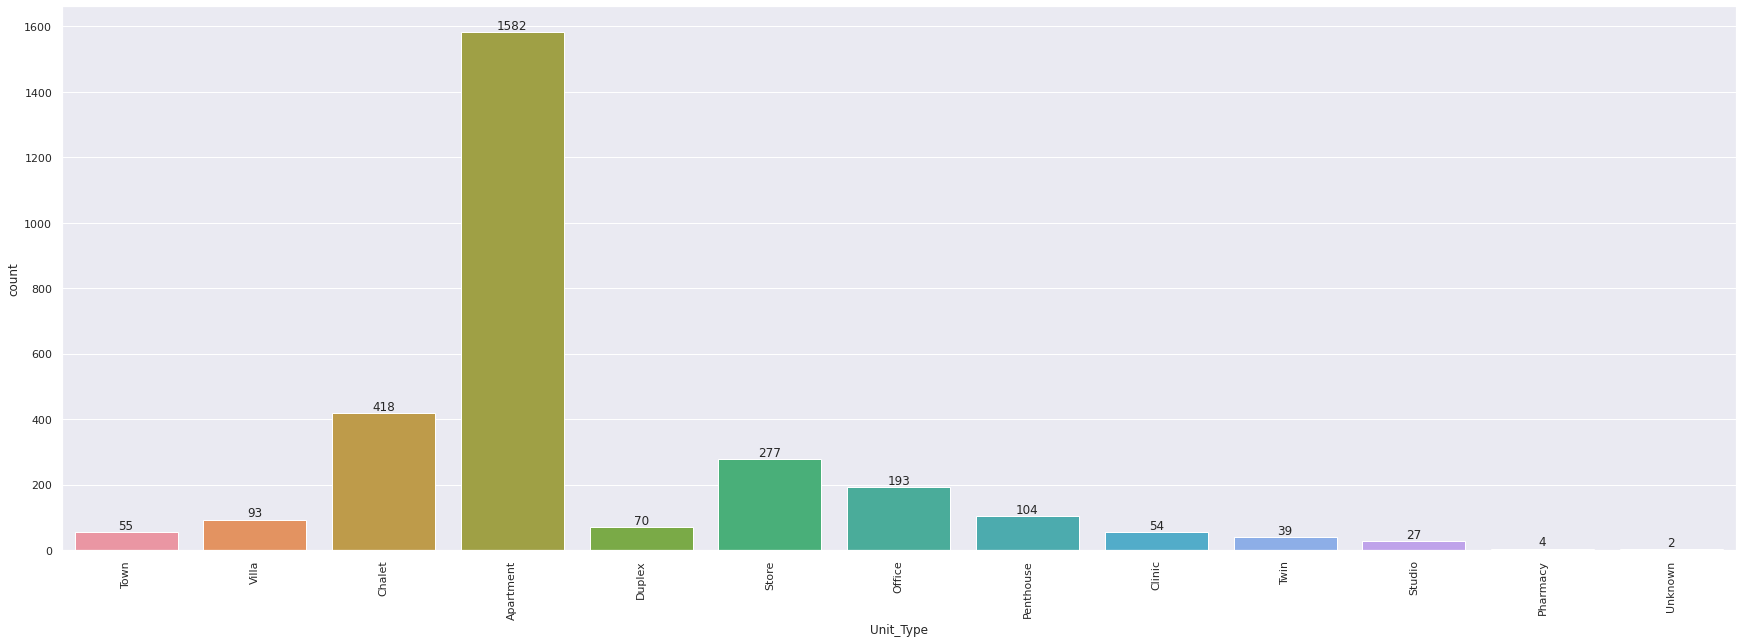

In [ ]:
ax=sns.countplot(moderate_price['Unit_Type'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


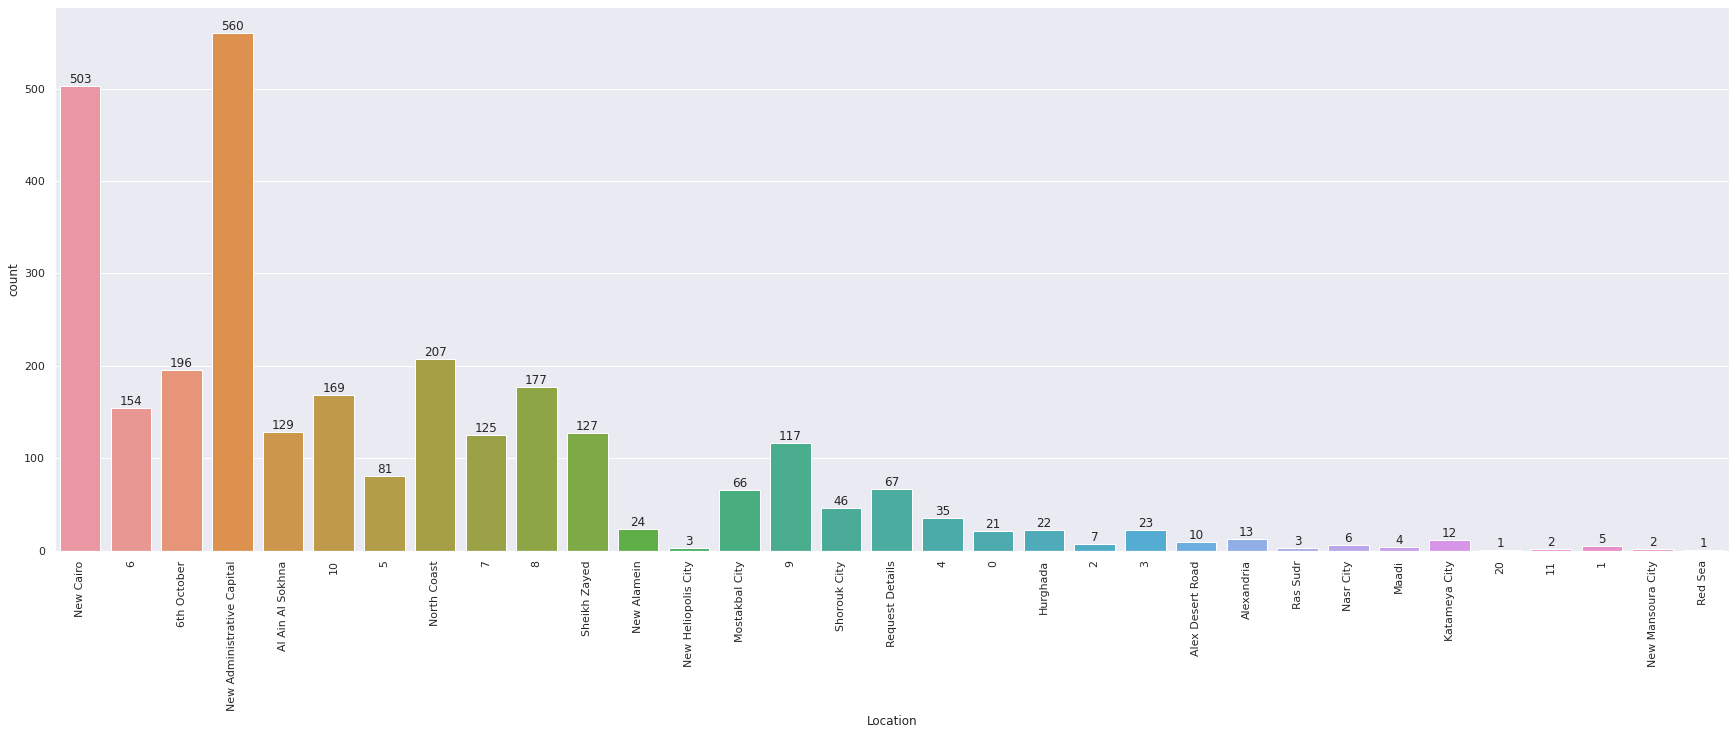

In [ ]:
ax=sns.countplot(moderate_price['Location'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


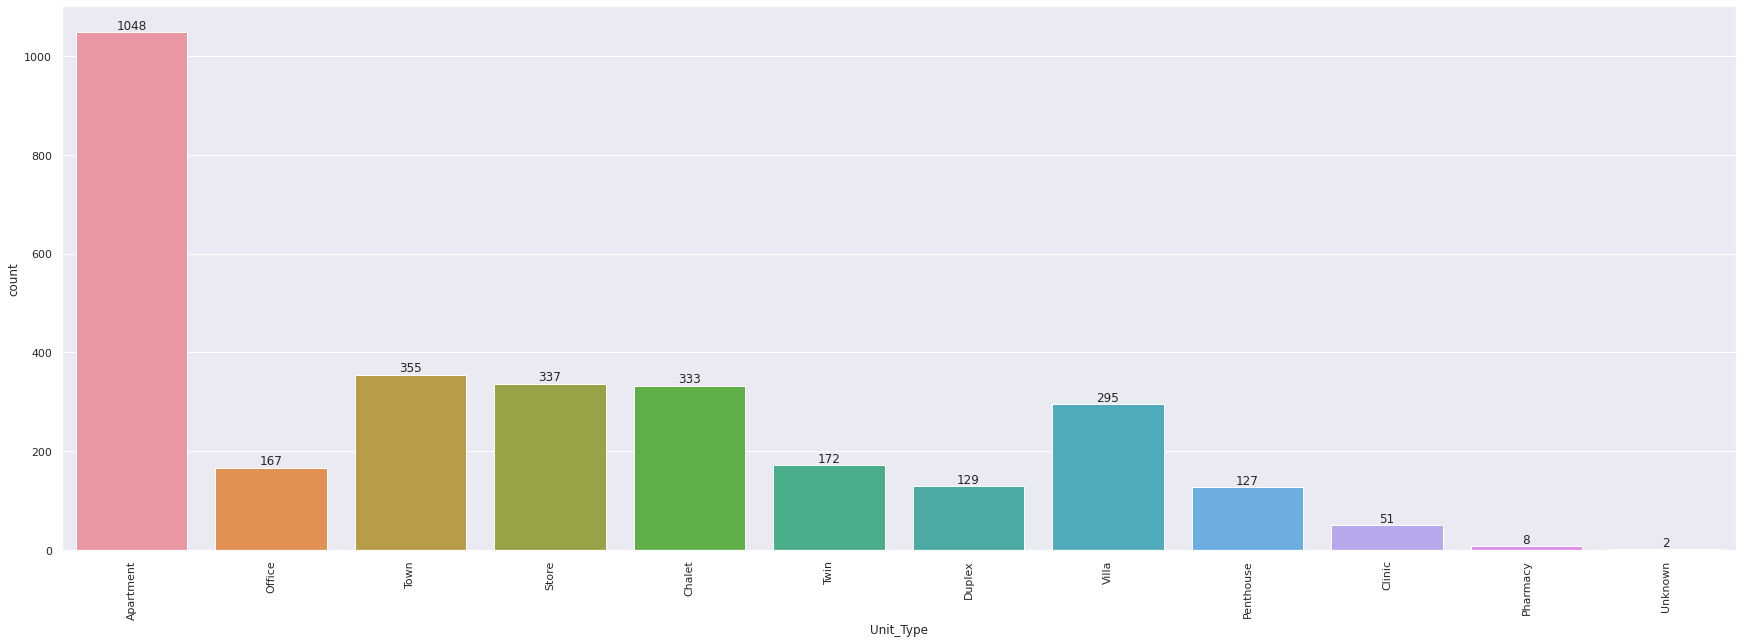

In [ ]:
ax=sns.countplot(high_price['Unit_Type'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


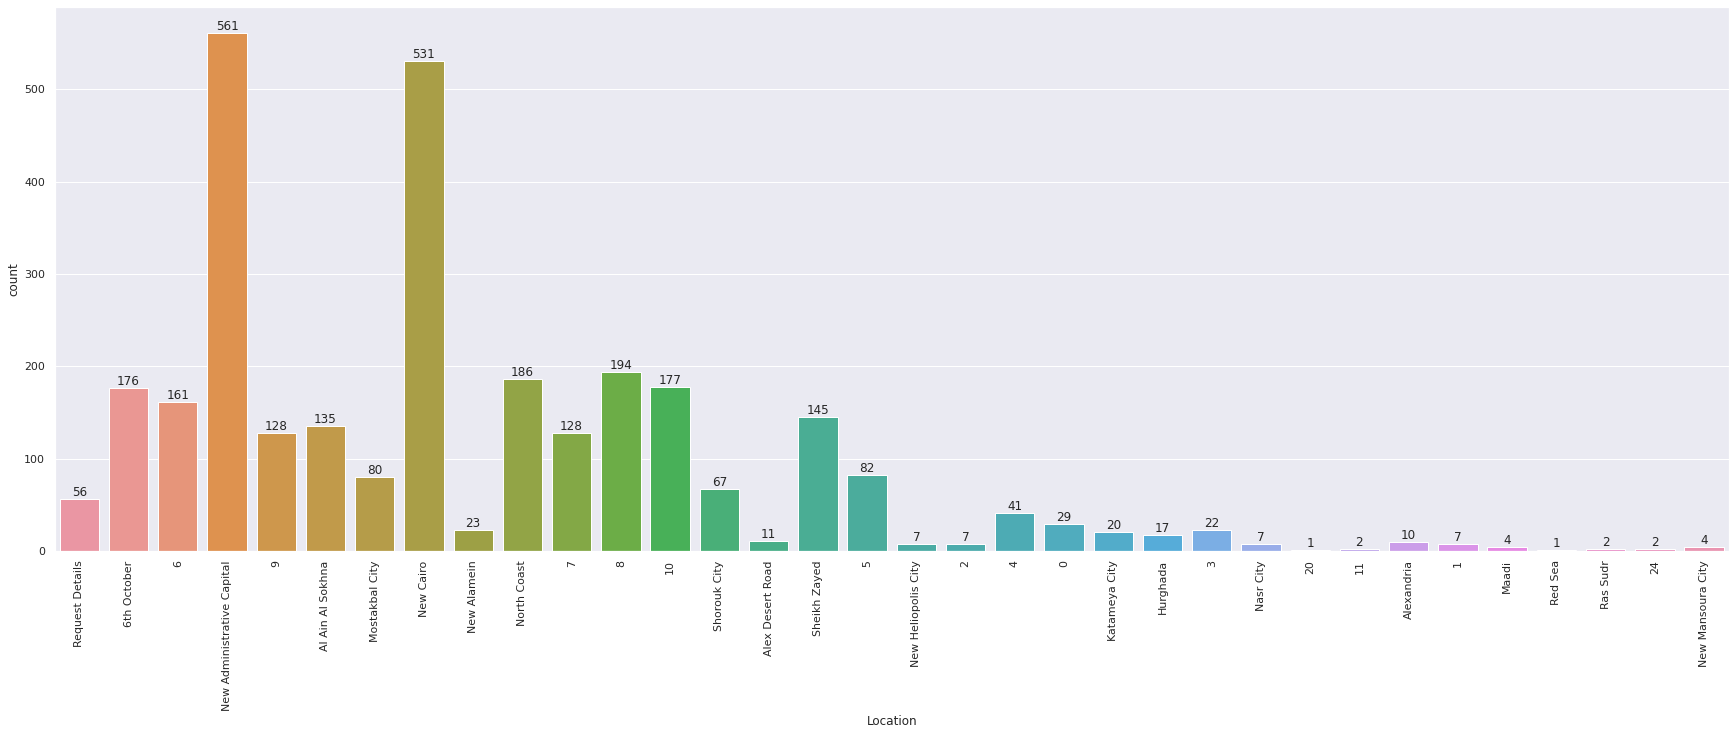

In [ ]:
ax=sns.countplot(high_price['Location'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


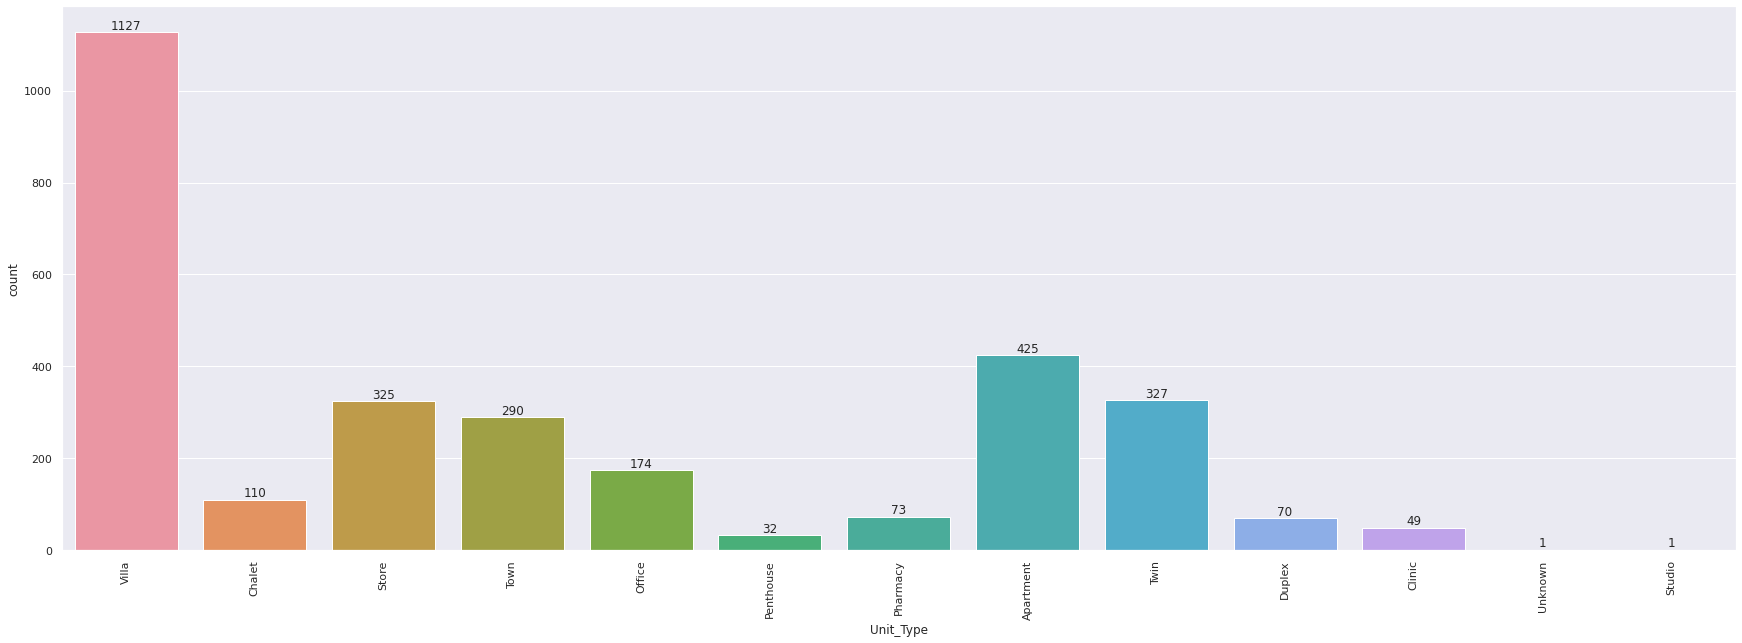

In [ ]:
ax=sns.countplot(expensive['Unit_Type'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


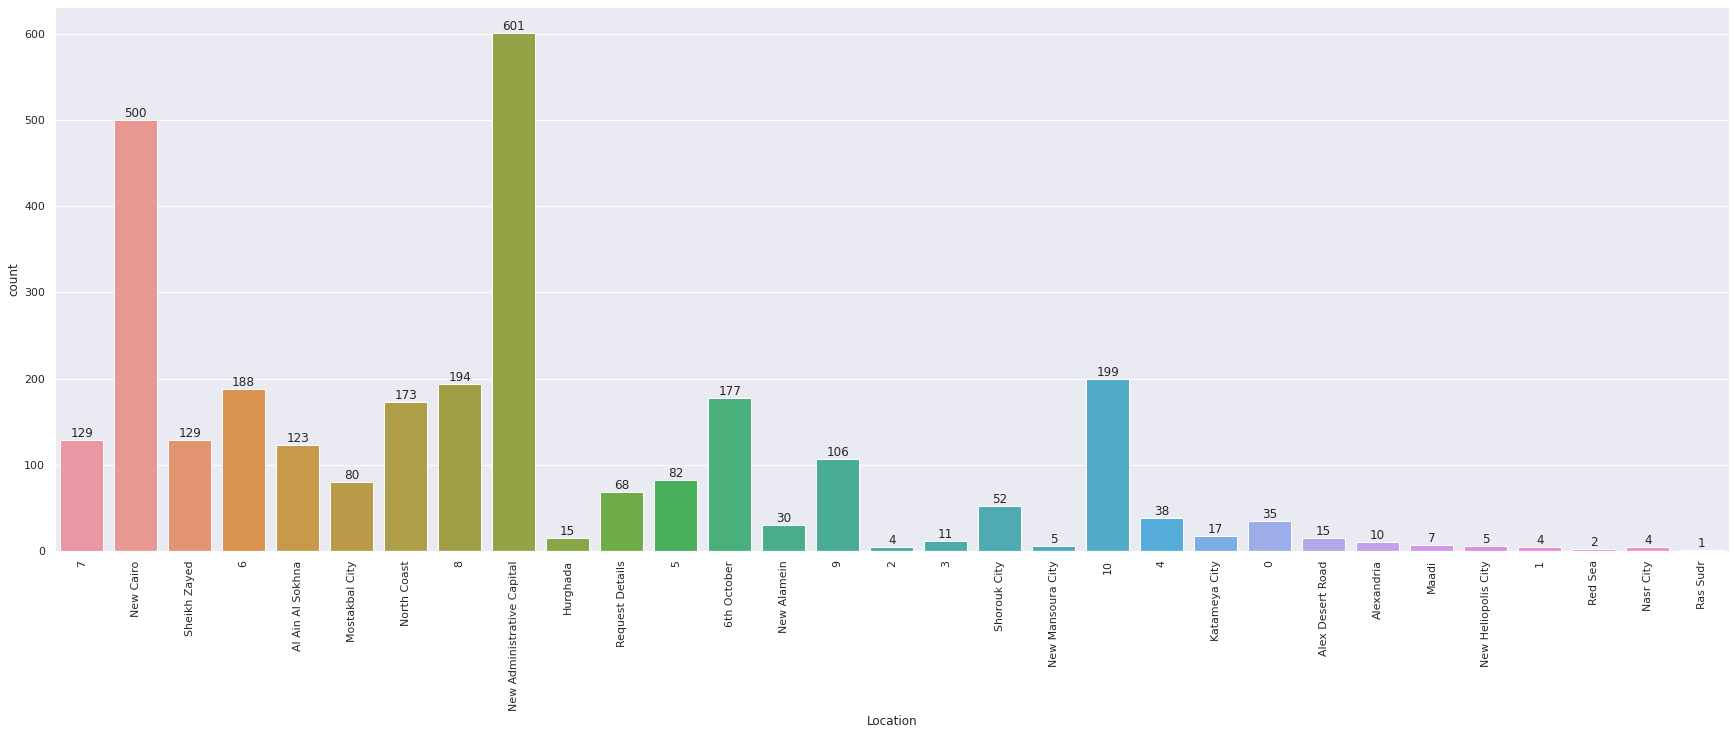

In [ ]:
ax=sns.countplot(expensive['Location'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


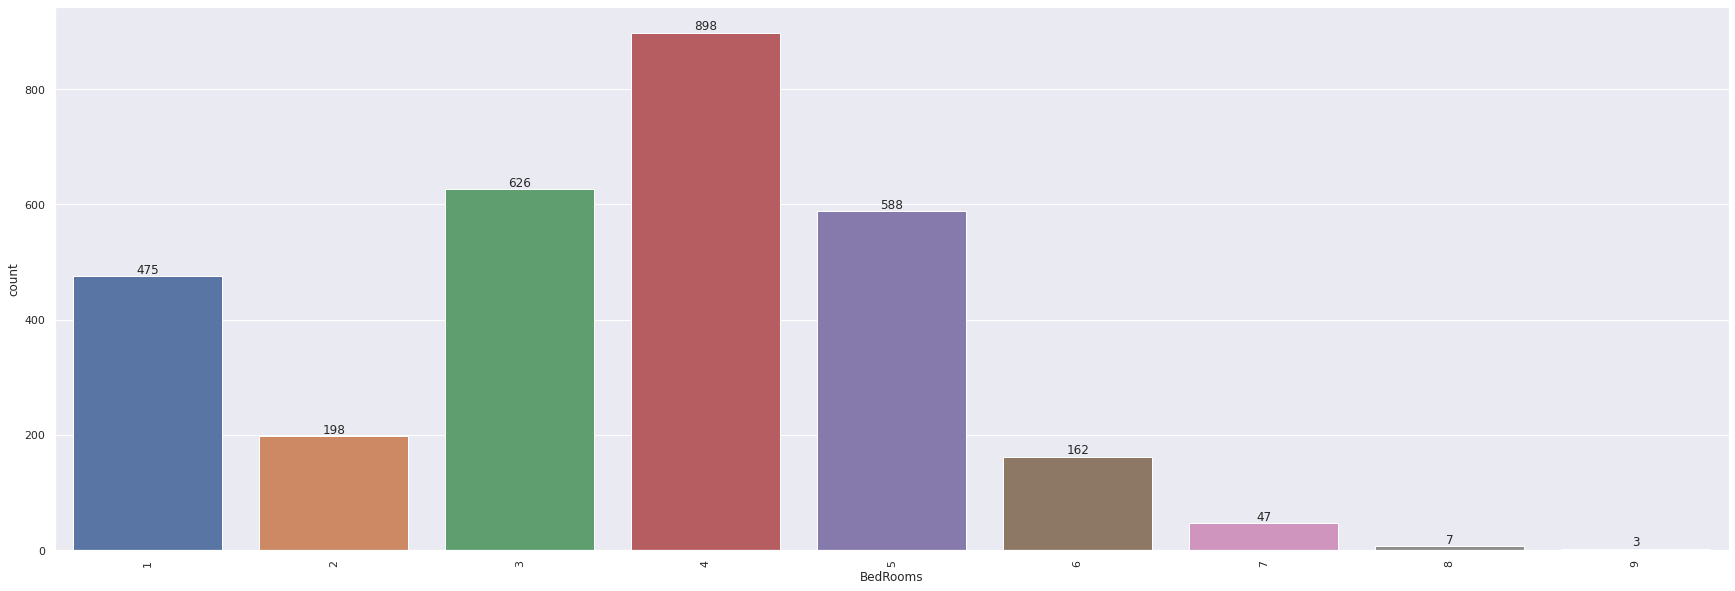

In [ ]:
ax=sns.countplot(expensive['BedRooms'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


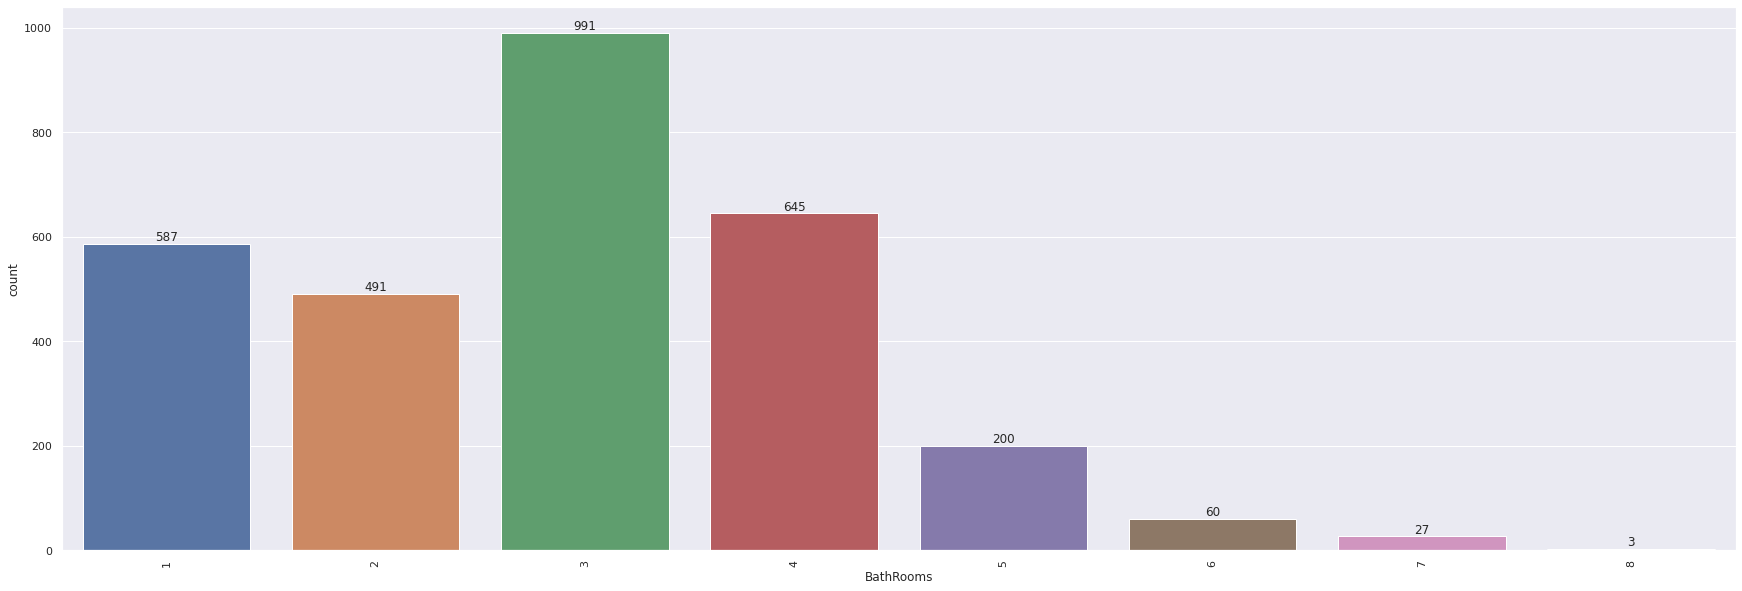

In [ ]:
ax=sns.countplot(expensive['BathRooms'])
sns.set(rc={'figure.figsize':(30,10)})
ax.bar_label(ax.containers[-1],  fmt='%.0f', label_type='edge')
plt.xticks(rotation = 90)
plt.show()

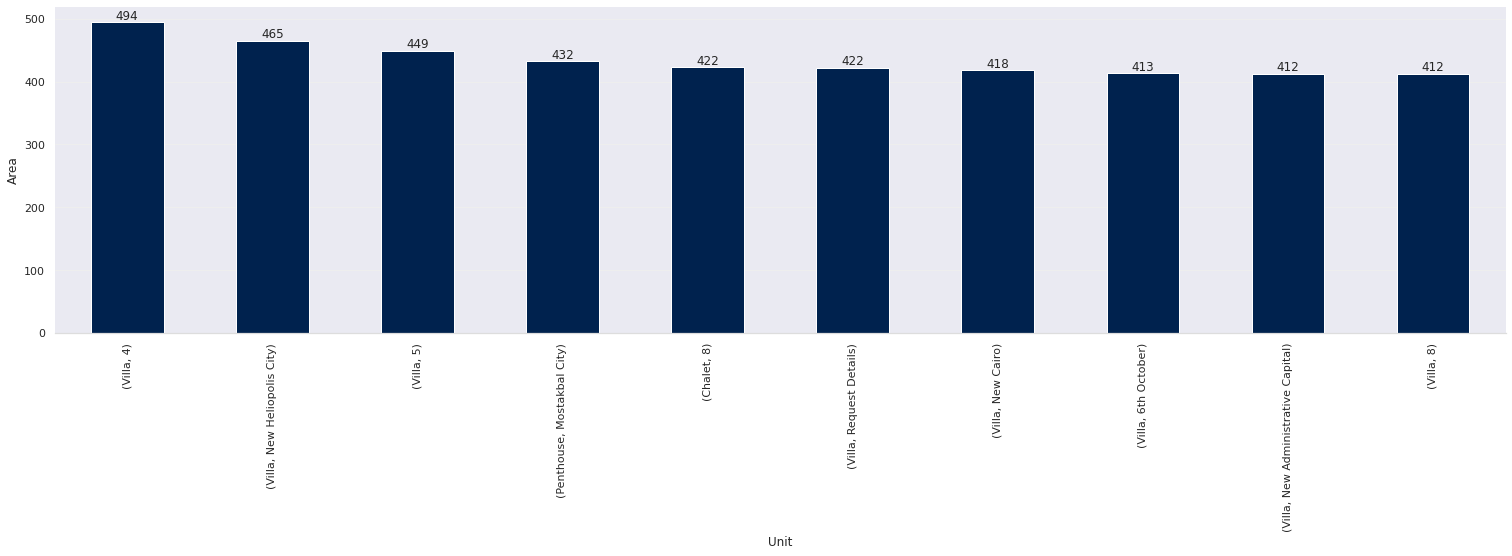

In [ ]:
expensive_area=expensive.groupby(['Unit_Type','Location'])['Area'].mean()
expensive_area=expensive_area.nlargest(10)
bar(expensive_area, 'Unit', 'Area', '')

In [ ]:
df2=df.loc[:, df.columns.drop(['Title','Unit_Type','Location','price_levels','BedRooms','BathRooms'])]

In [ ]:
df2

,Price,Area,price_per_m2,bus_or_res
0,4100.000,171.0,23.976608,Residential
1,2800.000,158.0,17.721519,Residential
2,5954.581,265.0,22.470117,Residential
3,8675.325,317.0,27.366956,Residential
4,5184.000,162.0,32.000000,Business
...,...,...,...,...
11904,1024.000,64.0,16.000000,Residential
11905,2500.000,90.0,27.777778,Business
11906,2685.920,161.0,16.682733,Residential
11907,7276.000,338.0,21.526627,Residential


/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: ignored

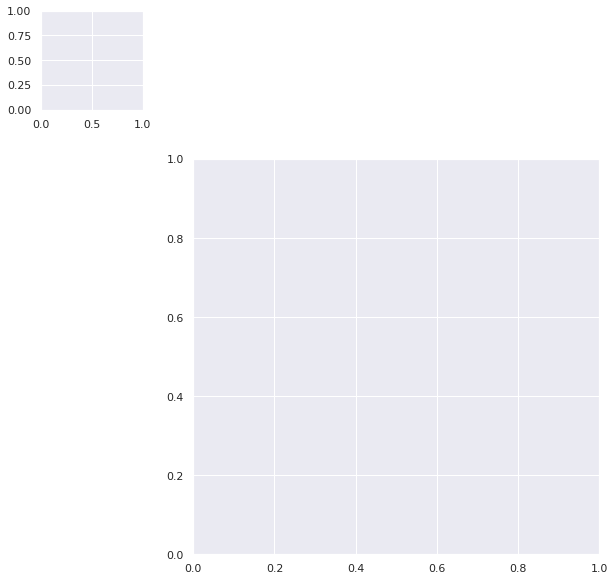

In [ ]:
sns.clustermap(df2
               , cmap = "mako",annot=True,
               vmin = -1, vmax = 1)

In [ ]:
df.info()

In [ ]:
df['Area'].describe()